In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub
import os

In [2]:
# Descargar dataset de KaggleHub
dataset_path = kagglehub.dataset_download("jerryqu/reddit-conversations")

100%|██████████| 1.83M/1.83M [00:00<00:00, 35.2MB/s]

Extracting files...


In [3]:
# Ruta al archivo CSV descargado
file_path = os.path.join(dataset_path, "casual_data_windows.csv")

In [4]:
# Cargar el dataset CSV
df = pd.read_csv(file_path)
print("Vista previa de los datos originales:")
print(df.head())


Vista previa de los datos originales:
   Unnamed: 0                                                  0  \
0           0            What kind of phone(s) do you guys have?   
1           1  I have a pixel. It's pretty great. Much better...   
2           2       Does it really charge all the way in 15 min?   
3           3            What kind of phone(s) do you guys have?   
4           4  Samsung Galaxy J1. It's my first cell phone an...   

                                                   1  \
0  I have a pixel. It's pretty great. Much better...   
1       Does it really charge all the way in 15 min?   
2  Pretty fast. I've never timed it, but it's und...   
3  Samsung Galaxy J1. It's my first cell phone an...   
4  What do you think of it? Anything you don't like?   

                                                   2  
0       Does it really charge all the way in 15 min?  
1  Pretty fast. I've never timed it, but it's und...  
2  cool. I've been thinking of getting one, my ph..

In [5]:
# Crear lista de aristas para el grafo basado en mensajes
graph_edges_messages = []
for _, row in df.iterrows():
    messages = row.dropna().tolist()  # Eliminar valores nulos en la conversación
    for i in range(len(messages) - 1):
        graph_edges_messages.append((messages[i], messages[i + 1]))

In [6]:
# Crear lista de aristas para el grafo basado en usuarios (asumiendo que cada mensaje tiene un usuario asociado)
df['user'] = [f'User_{i%10}' for i in range(len(df))]  # Simulación de usuarios
graph_edges_users = []
for i in range(len(df) - 1):
    graph_edges_users.append((df.iloc[i]['user'], df.iloc[i + 1]['user']))

In [7]:
# Crear grafo de interacciones basado en mensajes
G_messages = nx.DiGraph()
G_messages.add_edges_from(graph_edges_messages)
G_messages = G_messages.subgraph(list(G_messages.nodes)[:100])  # Limitar a 100 nodos


In [8]:
# Crear grafo de interacciones basado en usuarios
G_users = nx.DiGraph()
G_users.add_edges_from(graph_edges_users)

In [9]:
# Fase Exploratoria
print(f"Número de nodos en grafo de mensajes: {G_messages.number_of_nodes()}")
print(f"Número de aristas en grafo de mensajes: {G_messages.number_of_edges()}")
print(f"Número de nodos en grafo de usuarios: {G_users.number_of_nodes()}")
print(f"Número de aristas en grafo de usuarios: {G_users.number_of_edges()}")


Número de nodos en grafo de mensajes: 100
Número de aristas en grafo de mensajes: 95
Número de nodos en grafo de usuarios: 10
Número de aristas en grafo de usuarios: 10


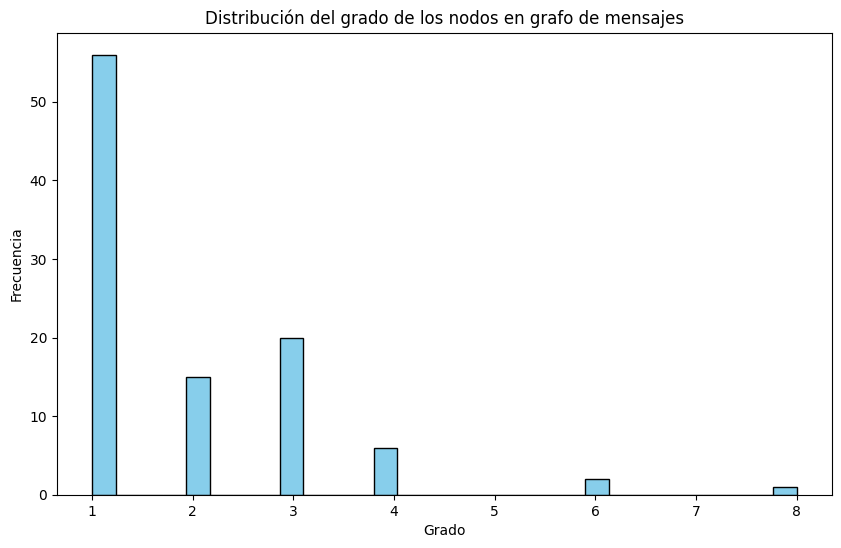

In [10]:
# Histograma del grado de los nodos en grafo de mensajes
grados = [d for _, d in G_messages.degree()]
plt.figure(figsize=(10, 6))
plt.hist(grados, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del grado de los nodos en grafo de mensajes')
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.show()

In [13]:
# Visualización del grafo de mensajes utilizando diferentes algoritmos
def plot_graph(G, layout, title, color, **layout_kwargs): # Pass any layout-specific arguments
    plt.figure(figsize=(12, 8))

    # Pass layout_kwargs to the layout function
    pos = layout(G, **layout_kwargs)

    nx.draw(G, pos, node_size=10, node_color=color, edge_color='gray', with_labels=True, font_size=6)
    plt.title(title)
    plt.show()

In [15]:
# Visualización del grafo de mensajes utilizando diferentes algoritmos
def plot_graph(G, layout, title, color, **layout_kwargs): # Pass any layout-specific arguments
    plt.figure(figsize=(12, 8))

    # If using multipartite_layout, and the nodes don't have a 'layer' attribute, assign one
    if layout == nx.multipartite_layout and 'subset_key' in layout_kwargs and layout_kwargs['subset_key'] == "layer":
        for node in G.nodes():
            G.nodes[node]['layer'] = 0  # Assign all nodes to the same layer (you might want to change this based on your actual data)

    # Pass layout_kwargs to the layout function
    pos = layout(G, **layout_kwargs)

    nx.draw(G, pos, node_size=10, node_color=color, edge_color='gray', with_labels=True, font_size=6)
    plt.title(title)
    plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


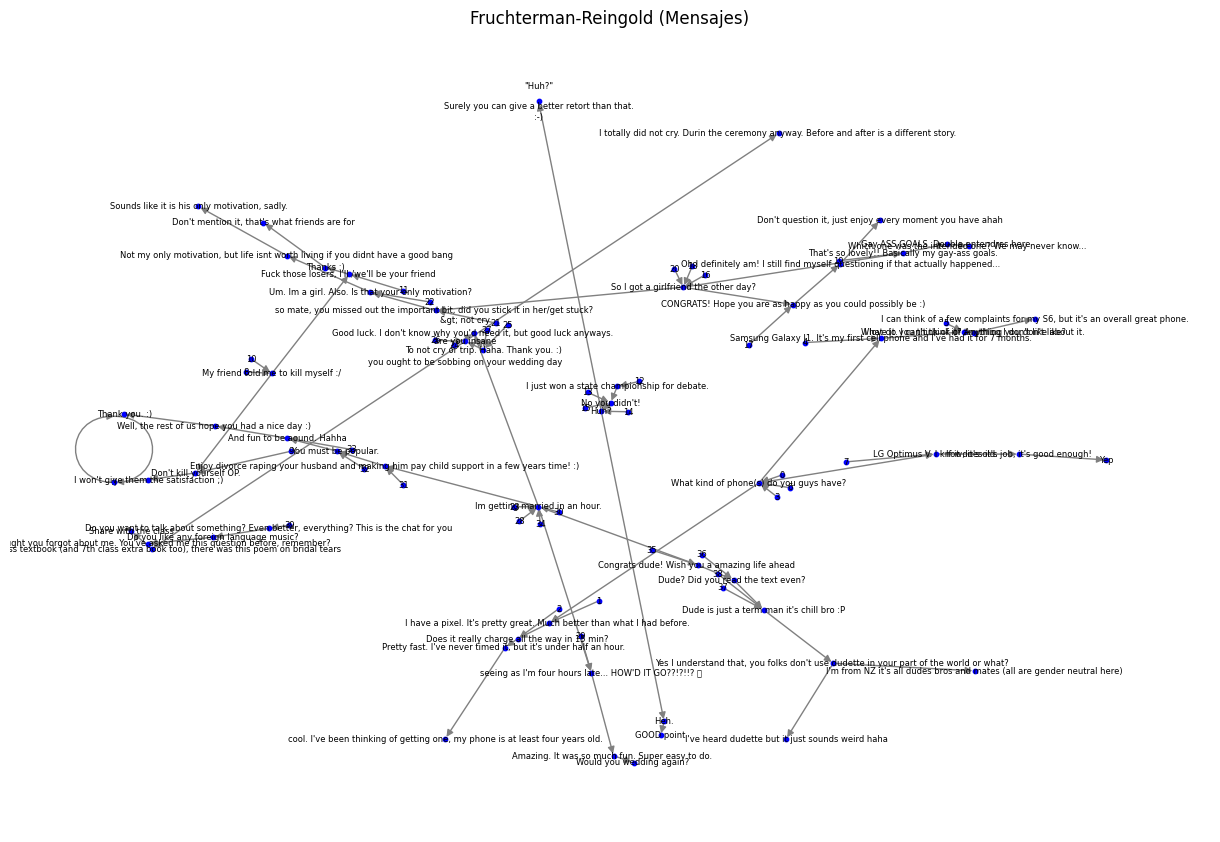

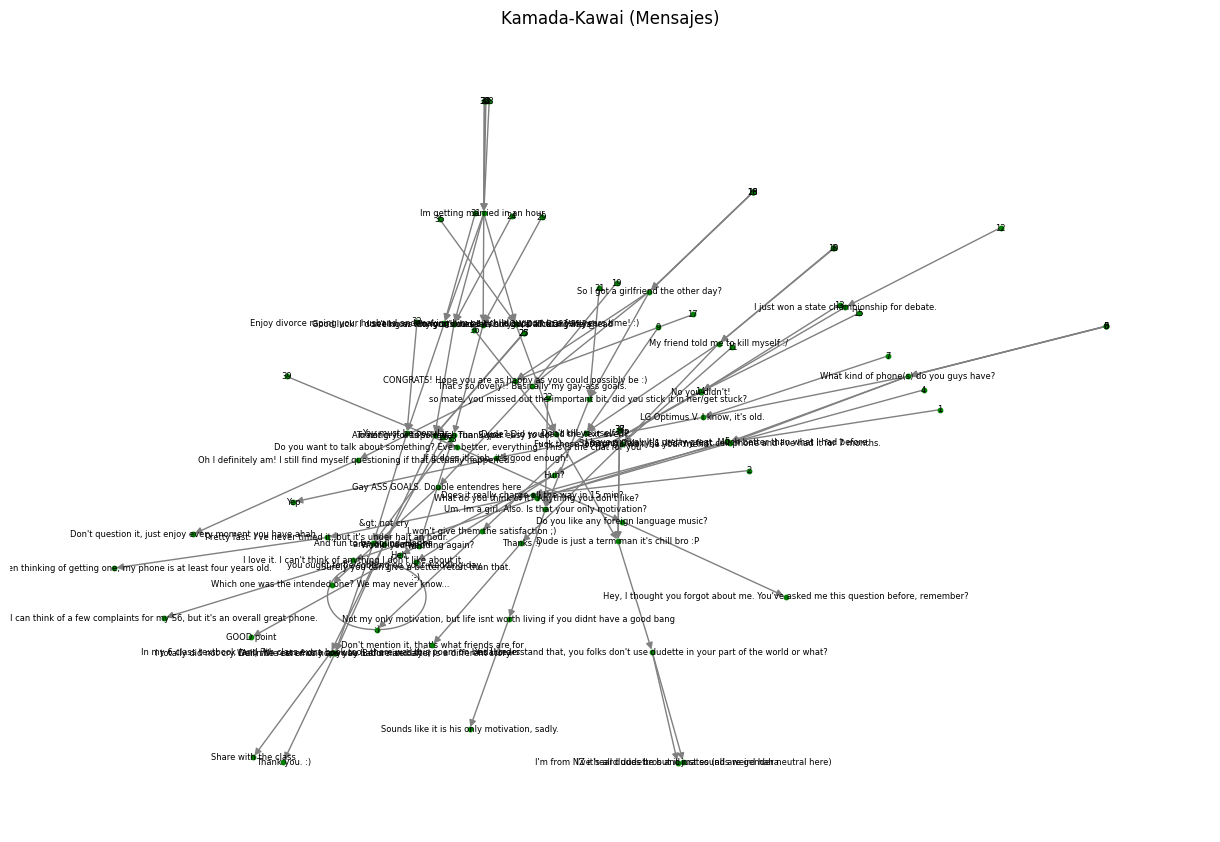

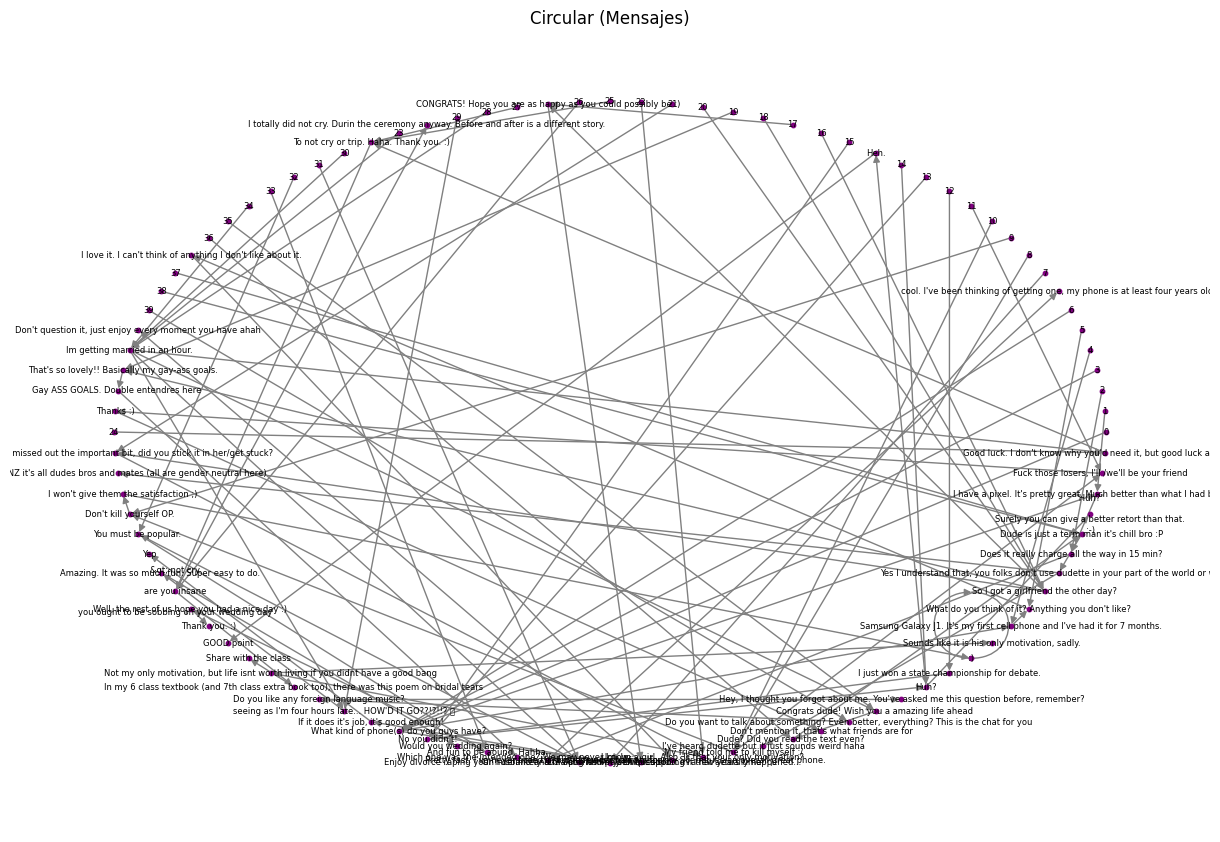

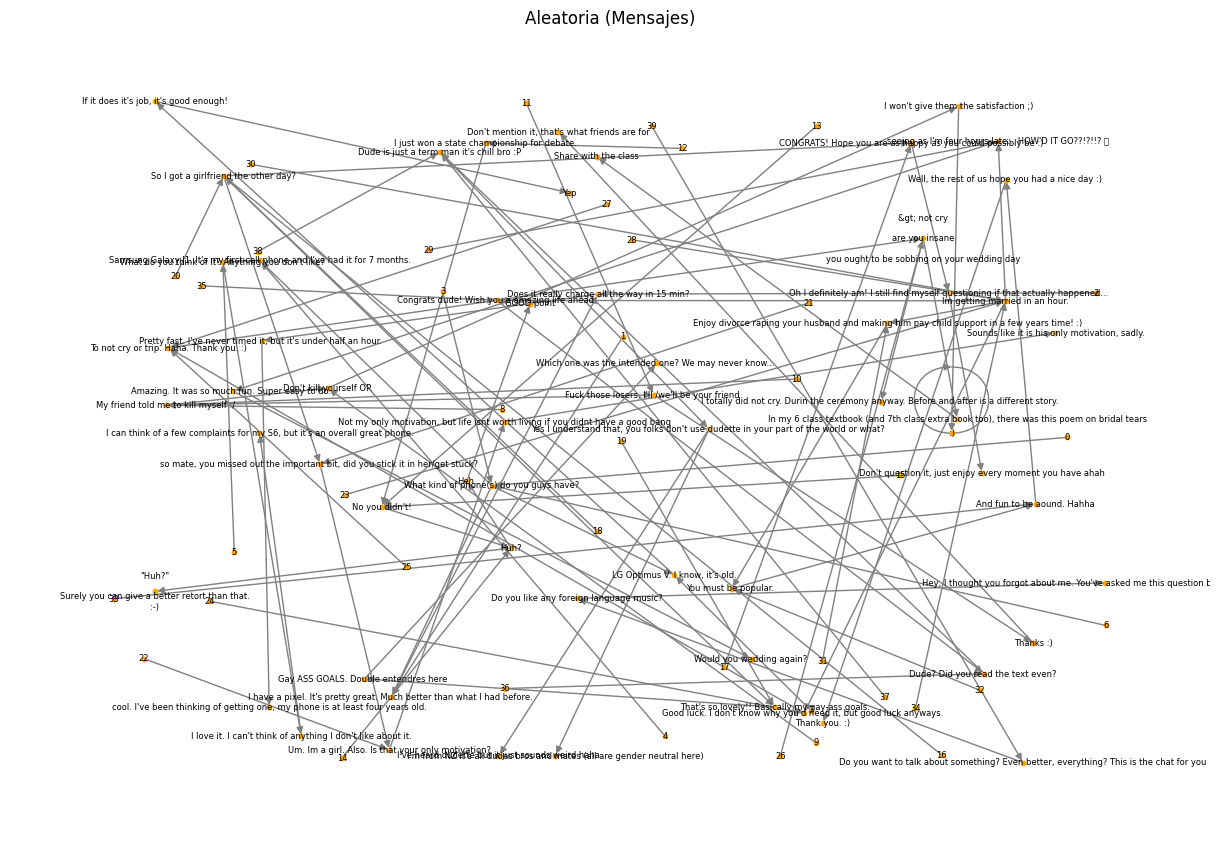

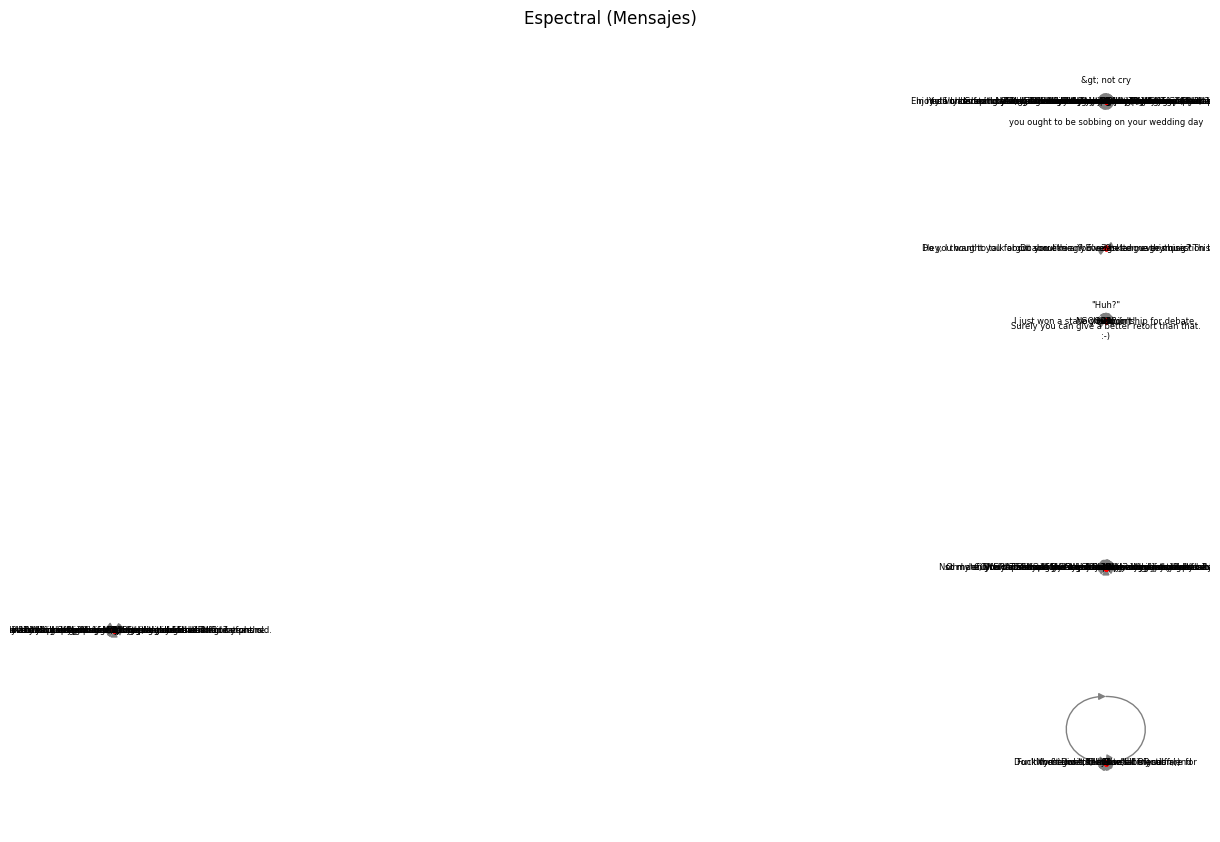

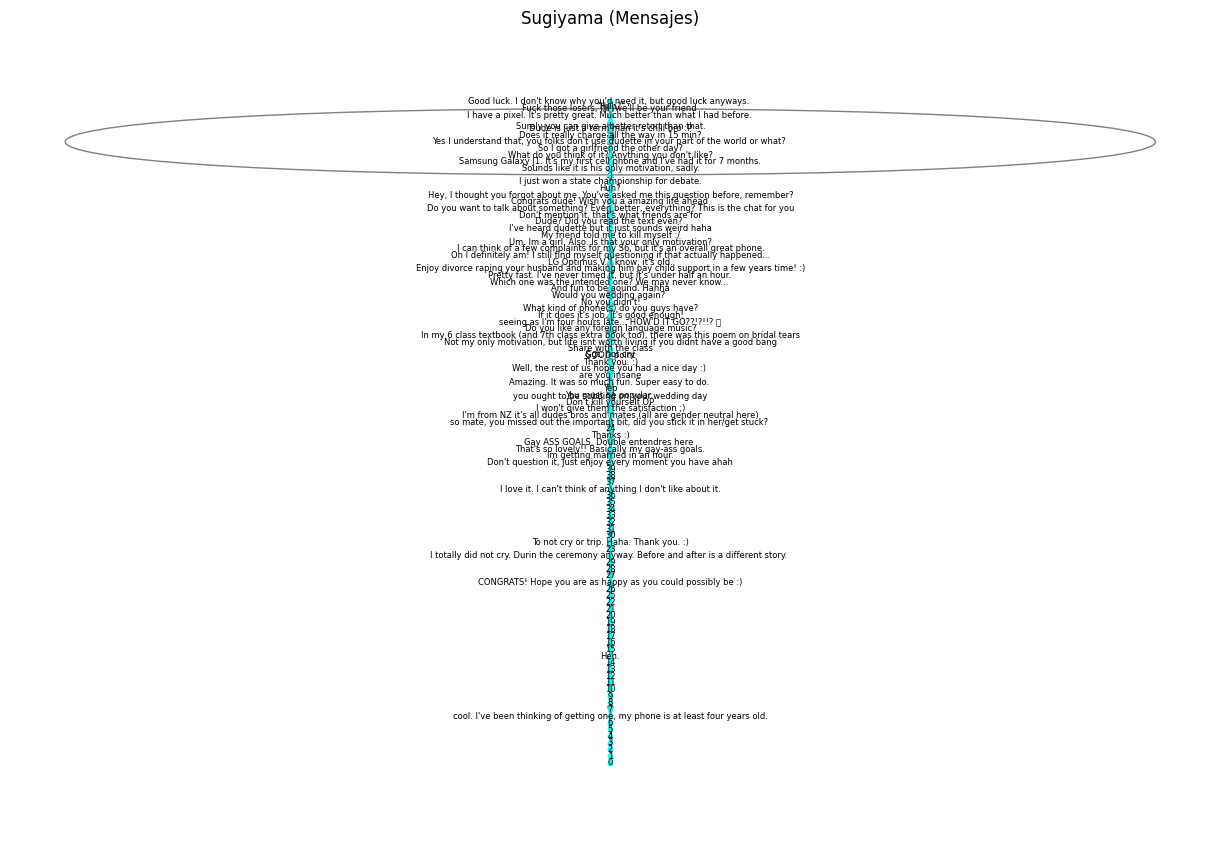

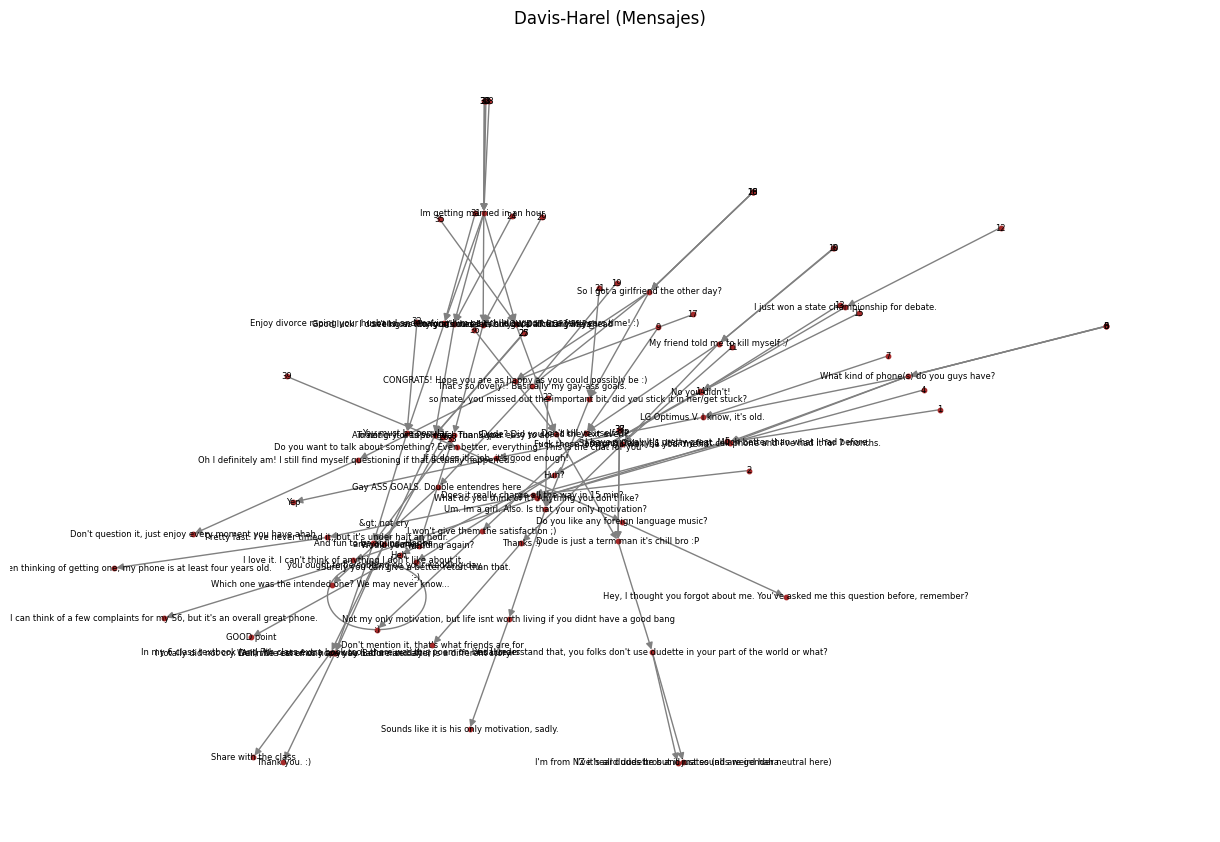

In [16]:
plot_graph(G_messages, nx.spring_layout, 'Fruchterman-Reingold (Mensajes)', 'blue')
plot_graph(G_messages, nx.kamada_kawai_layout, 'Kamada-Kawai (Mensajes)', 'green')
plot_graph(G_messages, nx.circular_layout, 'Circular (Mensajes)', 'purple')
plot_graph(G_messages, nx.random_layout, 'Aleatoria (Mensajes)', 'orange')
plot_graph(G_messages, nx.spectral_layout, 'Espectral (Mensajes)', 'red')
plot_graph(G_messages, nx.multipartite_layout, 'Sugiyama (Mensajes)', 'cyan', subset_key="layer")
plot_graph(G_messages, nx.kamada_kawai_layout, 'Davis-Harel (Mensajes)', 'brown')

In [21]:
def plot_graph(G, layout, title, color, **layout_kwargs):
    plt.figure(figsize=(12, 8))

    # Asignar capa si es multipartite_layout
    if layout == nx.multipartite_layout and 'subset_key' in layout_kwargs and layout_kwargs['subset_key'] == "layer":
        for node in G.nodes():
            G.nodes[node]['layer'] = 0

    # Pass k to the layout function, if it's spring_layout ONLY. Remove k for kamada_kawai_layout
    if layout == nx.spring_layout: # Only pass k to spring_layout
        pos = layout(G, k=0.5, **layout_kwargs)  # Pass k here
    else:
        pos = layout(G, **layout_kwargs)

    # Ajustes para mejorar la visualización:
    nx.draw(G, pos,
            node_size=30,  # Nodos más pequeños
            node_color=color,
            edge_color='gray',
            with_labels=True,
            font_size=8,  # Letras más grandes
            width=0.5, # Grosor de las aristas más delgadas
            alpha=0.7, # Transparencia de nodos y aristas
           ) # Removed k from here
    plt.title(title)
    plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


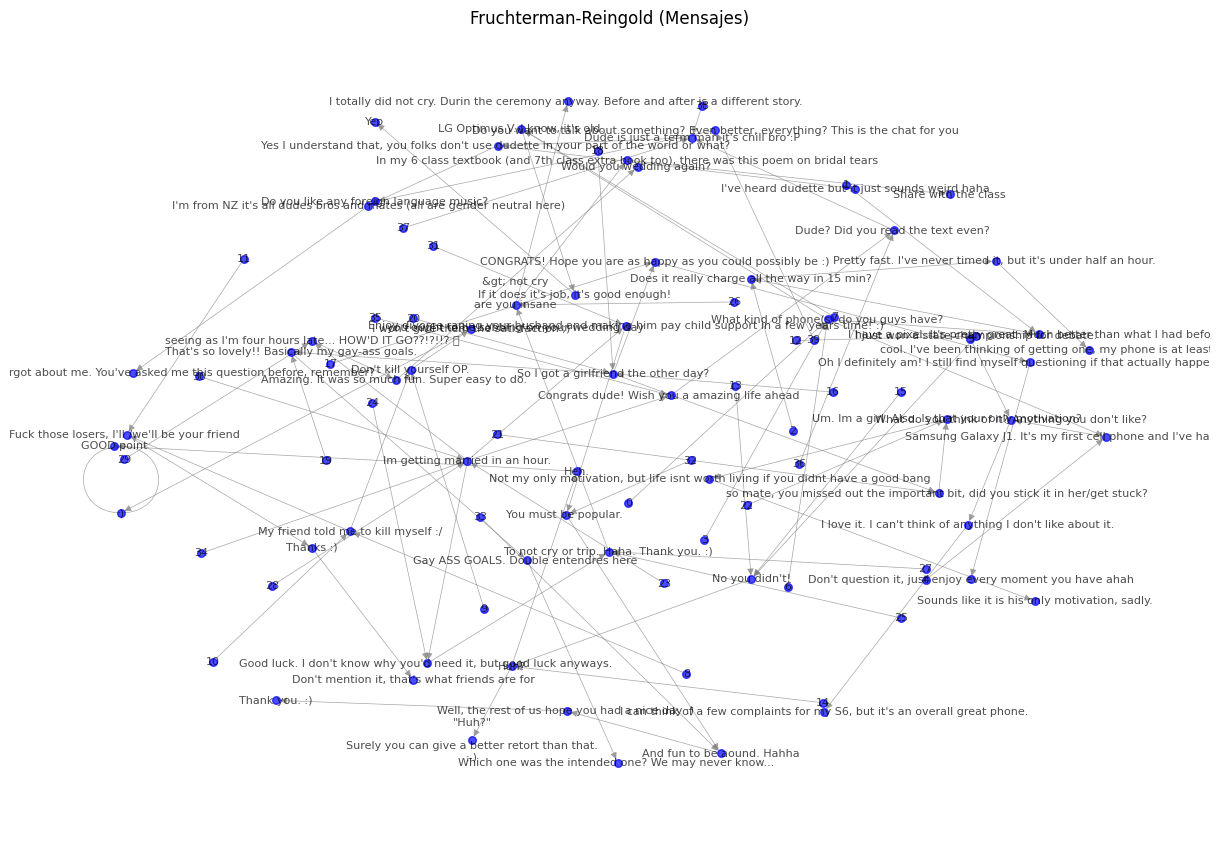

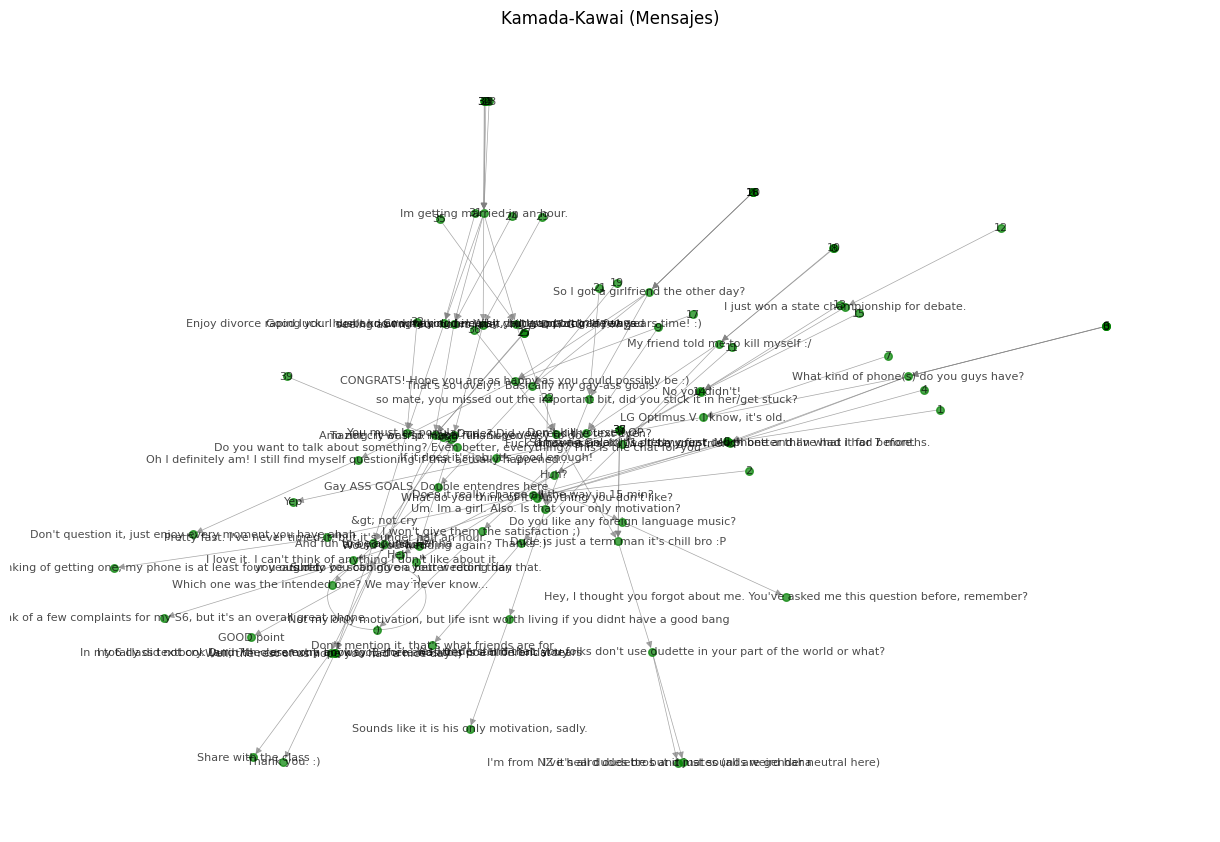

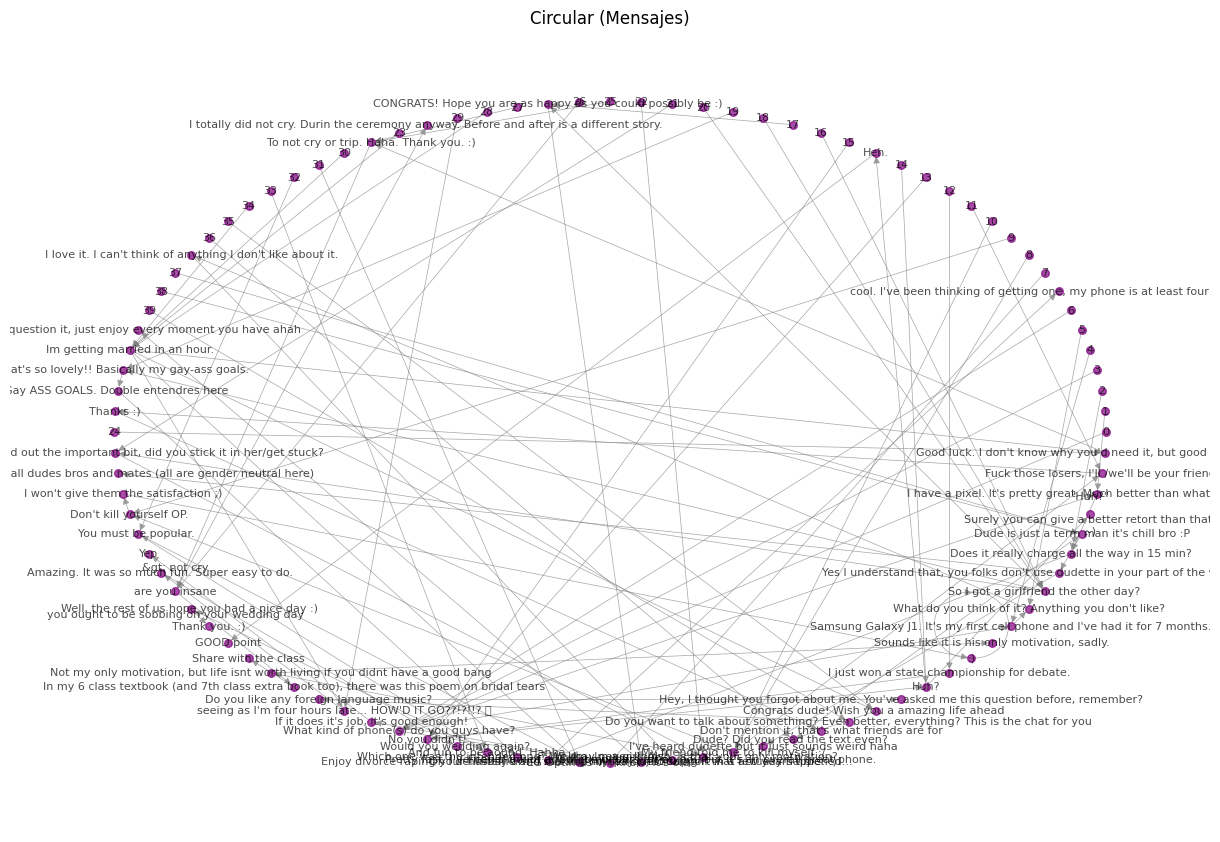

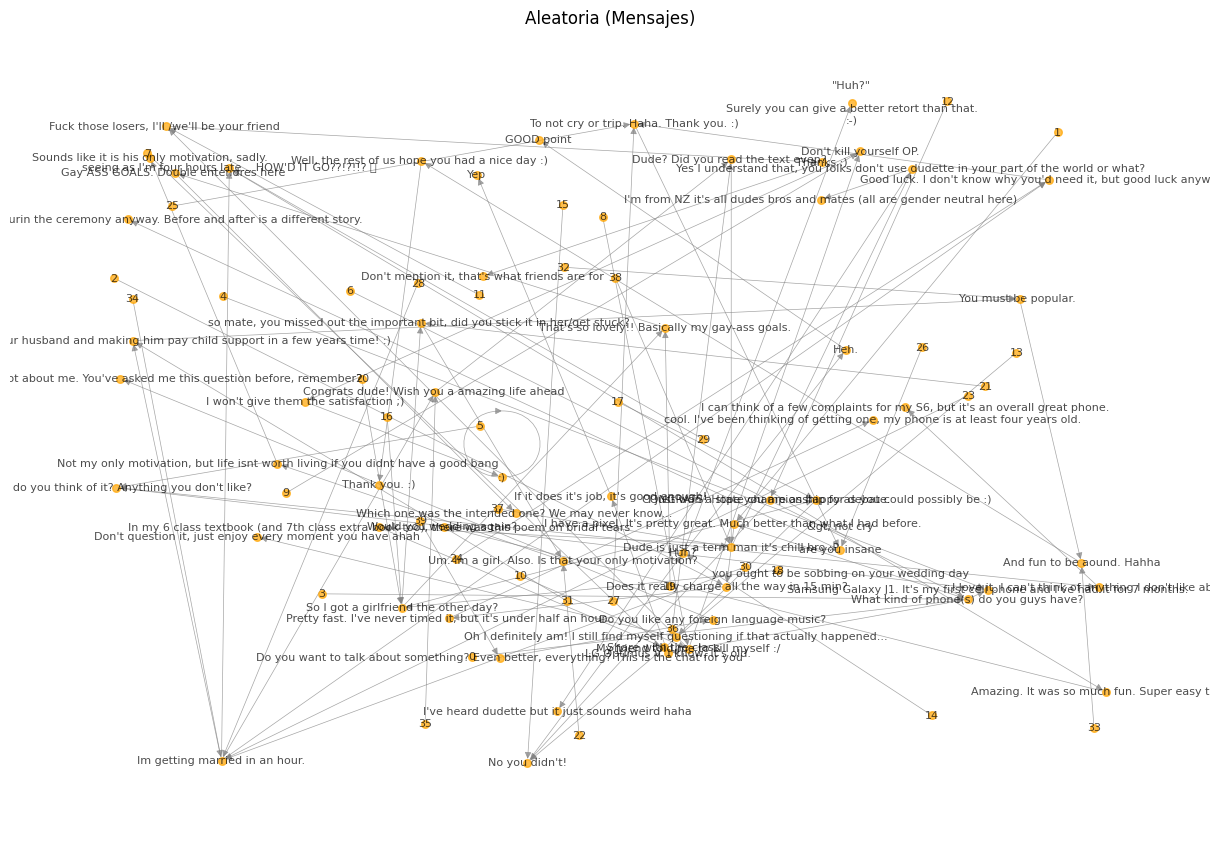

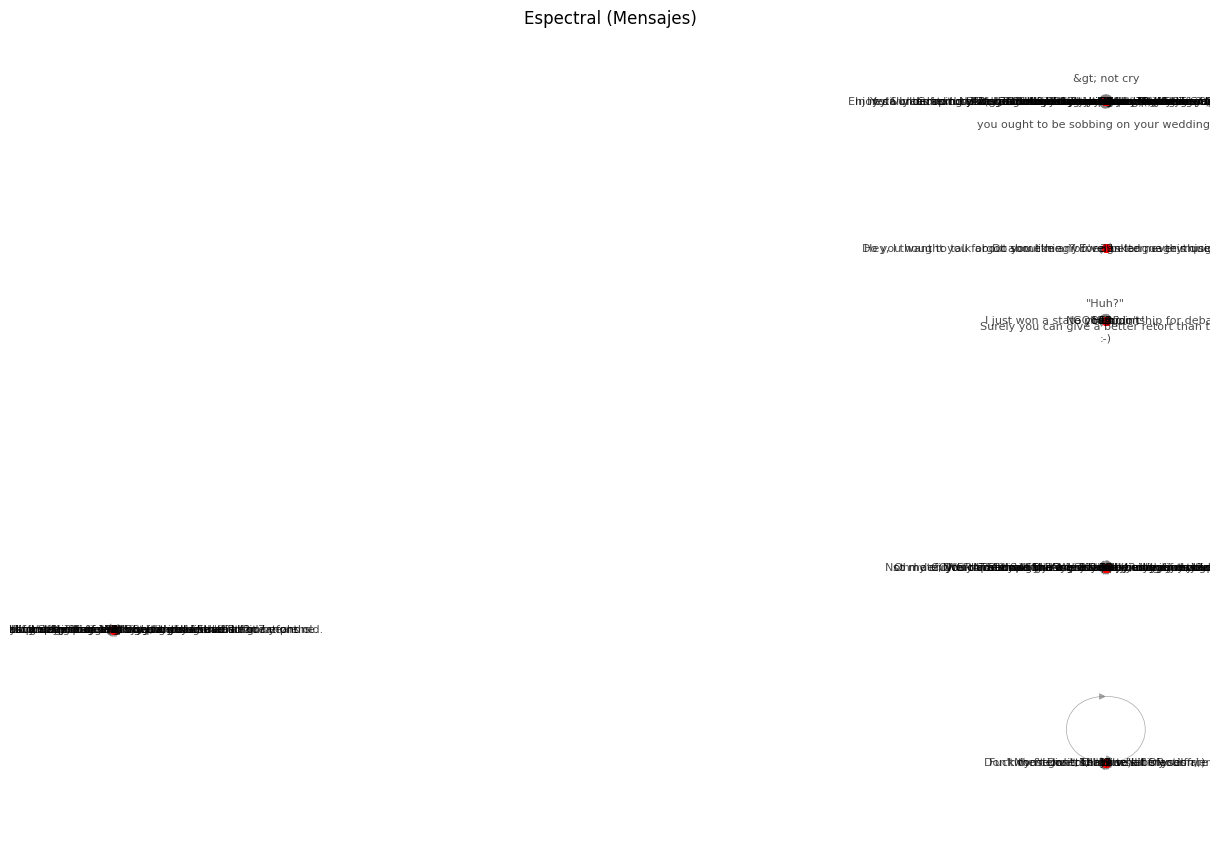

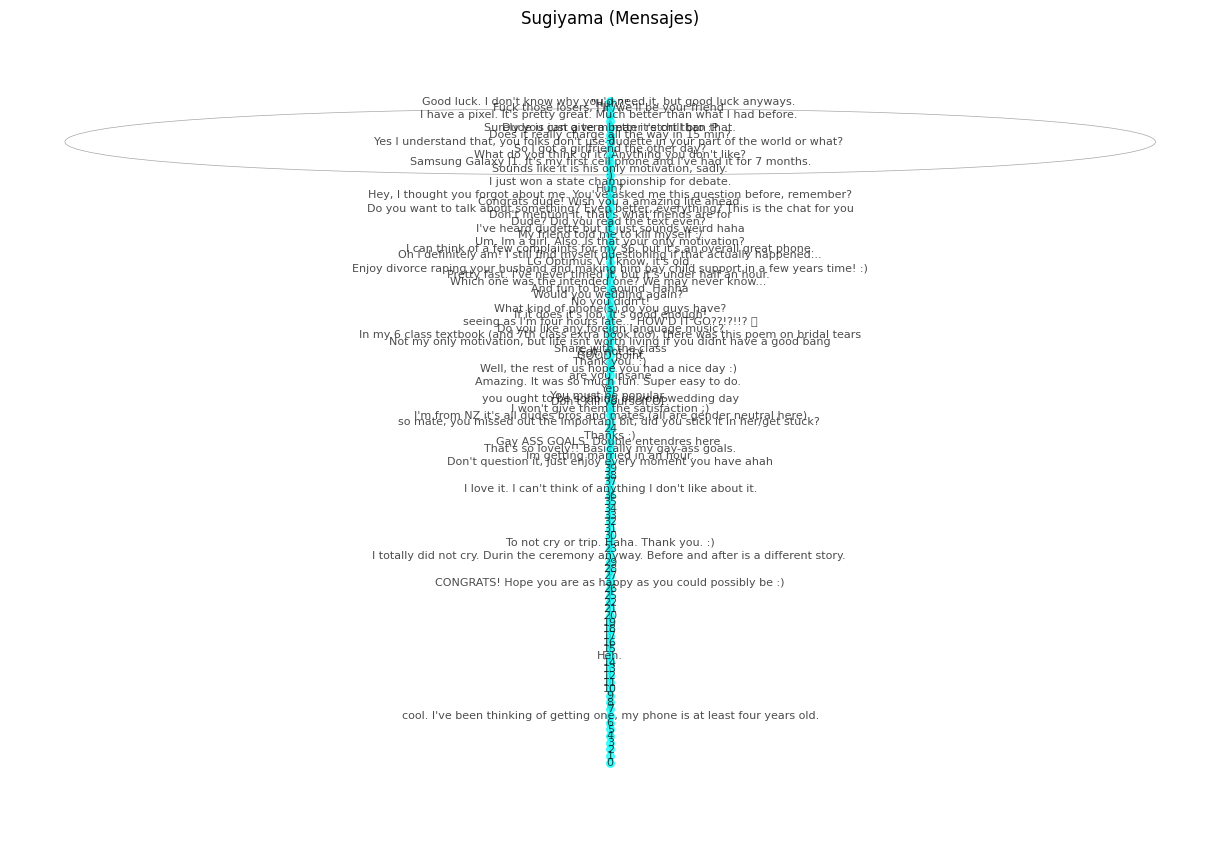

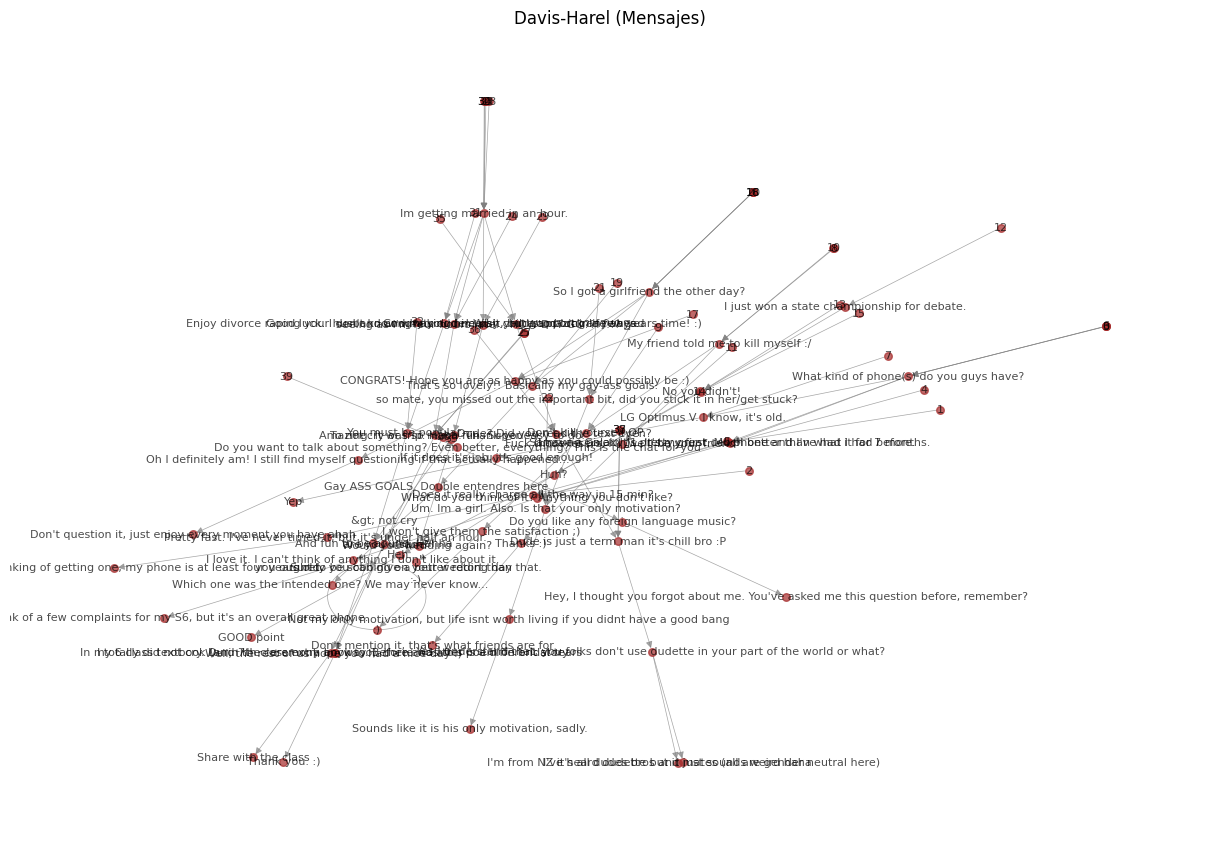

In [22]:
plot_graph(G_messages, nx.spring_layout, 'Fruchterman-Reingold (Mensajes)', 'blue')
plot_graph(G_messages, nx.kamada_kawai_layout, 'Kamada-Kawai (Mensajes)', 'green')
plot_graph(G_messages, nx.circular_layout, 'Circular (Mensajes)', 'purple')
plot_graph(G_messages, nx.random_layout, 'Aleatoria (Mensajes)', 'orange')
plot_graph(G_messages, nx.spectral_layout, 'Espectral (Mensajes)', 'red')
plot_graph(G_messages, nx.multipartite_layout, 'Sugiyama (Mensajes)', 'cyan', subset_key="layer")
plot_graph(G_messages, nx.kamada_kawai_layout, 'Davis-Harel (Mensajes)', 'brown')

In [23]:
!pip install pandas networkx matplotlib

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


In [25]:
def plot_graph_with_table(G, layout, title, color, labels, **layout_kwargs):
    """
    Genera una visualización del grafo con números de nodos y una tabla de correspondencia.

    Args:
        G: El grafo de NetworkX.
        layout: La función de diseño (e.g., nx.spring_layout).
        title: Título del gráfico.
        color: Color de los nodos.
        labels: Diccionario que mapea los números de nodos a sus etiquetas.
        **layout_kwargs: Argumentos adicionales para la función de diseño.
    """
    plt.figure(figsize=(12, 8))

    # Asignar capa si es multipartite_layout
    if layout == nx.multipartite_layout and 'subset_key' in layout_kwargs and layout_kwargs['subset_key'] == "layer":
        for node in G.nodes():
            G.nodes[node]['layer'] = 0

    # Pass k to the layout function, if it's spring_layout ONLY. Remove k for kamada_kawai_layout
    if layout == nx.spring_layout: # Only pass k to spring_layout
        pos = layout(G, k=0.5, **layout_kwargs)  # Pass k here
    else:
        pos = layout(G, **layout_kwargs)

    # Dibujar el grafo con números de nodos
    nx.draw(G, pos,
            node_size=30,
            node_color=color,
            edge_color='gray',
            with_labels=True,
            font_size=8,
            width=0.5,
            alpha=0.7,
            labels={node: str(node) for node in G.nodes()}  # Usar números como etiquetas
           )
    plt.title(title)

    # Crear la tabla de correspondencia
    df_labels = pd.DataFrame(list(labels.items()), columns=['Nodo', 'Etiqueta'])

    # Mostrar la tabla junto al gráfico
    plt.table(cellText=df_labels.values, colLabels=df_labels.columns,
              loc='right', cellLoc='center', colWidths=[0.1, 0.3])

    plt.show()

In [26]:
# Crear lista de aristas para el grafo basado en usuarios (asumiendo que cada mensaje tiene un usuario asociado)
df['user'] = [f'User_{i%10}' for i in range(len(df))]  # Simulación de usuarios
graph_edges_users = []
for i in range(len(df) - 1):
    graph_edges_users.append((df.iloc[i]['user'], df.iloc[i + 1]['user']))

In [27]:
# Crear grafo de interacciones basado en mensajes
G_messages = nx.DiGraph()
G_messages.add_edges_from(graph_edges_messages)
G_messages = G_messages.subgraph(list(G_messages.nodes)[:100])  # Limitar a 100 nodos

In [28]:
# Crear grafo de interacciones basado en usuarios
G_users = nx.DiGraph()
G_users.add_edges_from(graph_edges_users)

In [29]:
# Crear diccionarios de etiquetas para mensajes y usuarios
labels_messages = {i: message for i, message in enumerate(G_messages.nodes())}
labels_users = {i: user for i, user in enumerate(G_users.nodes())}

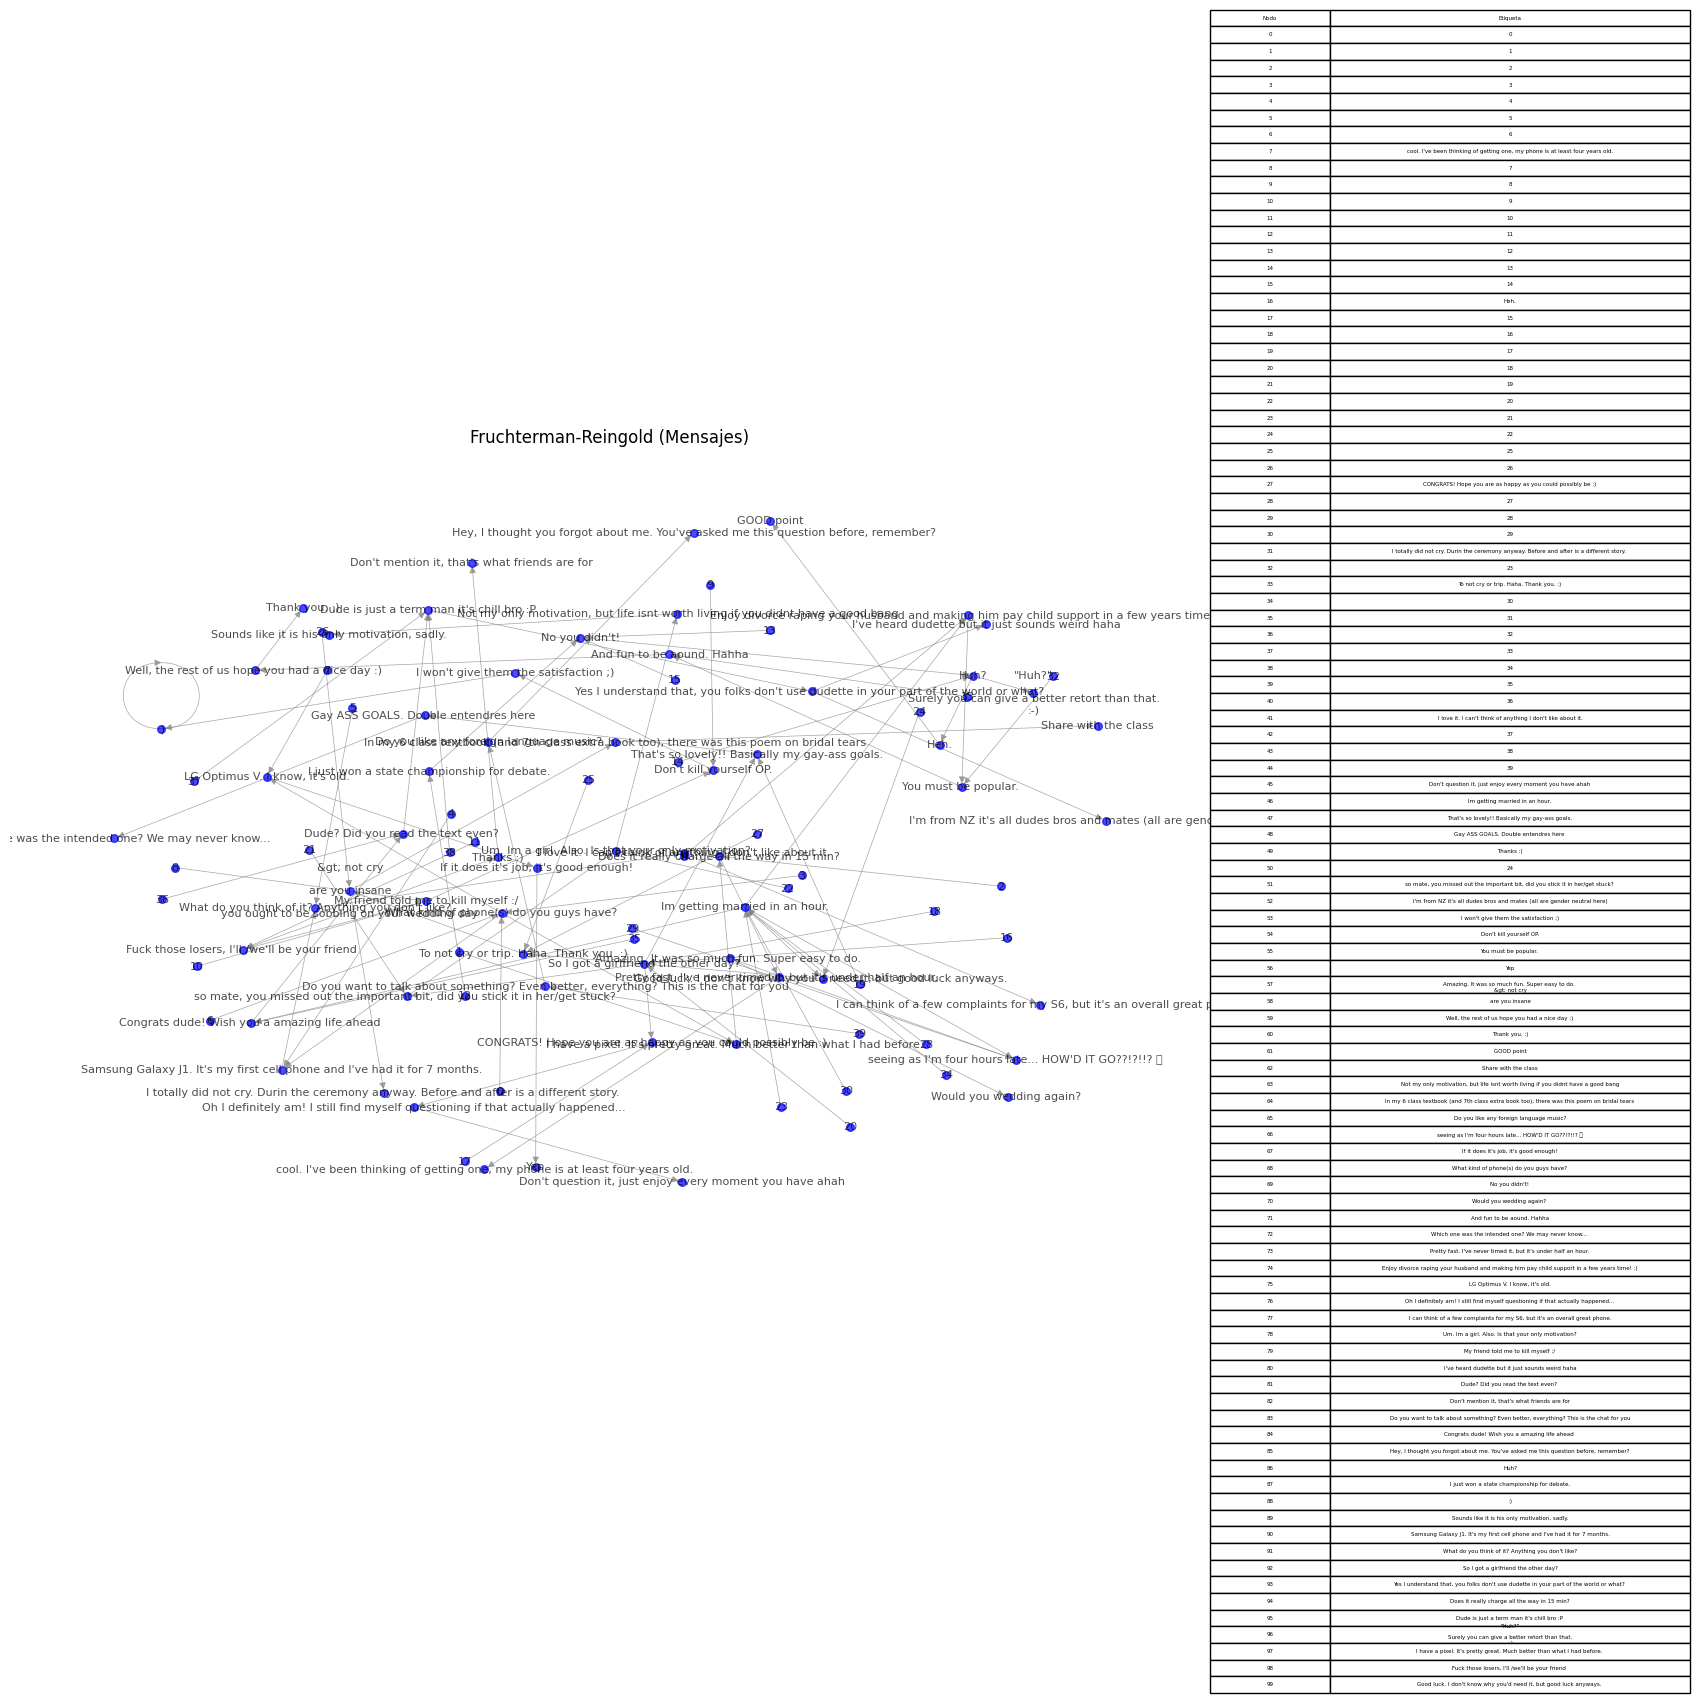

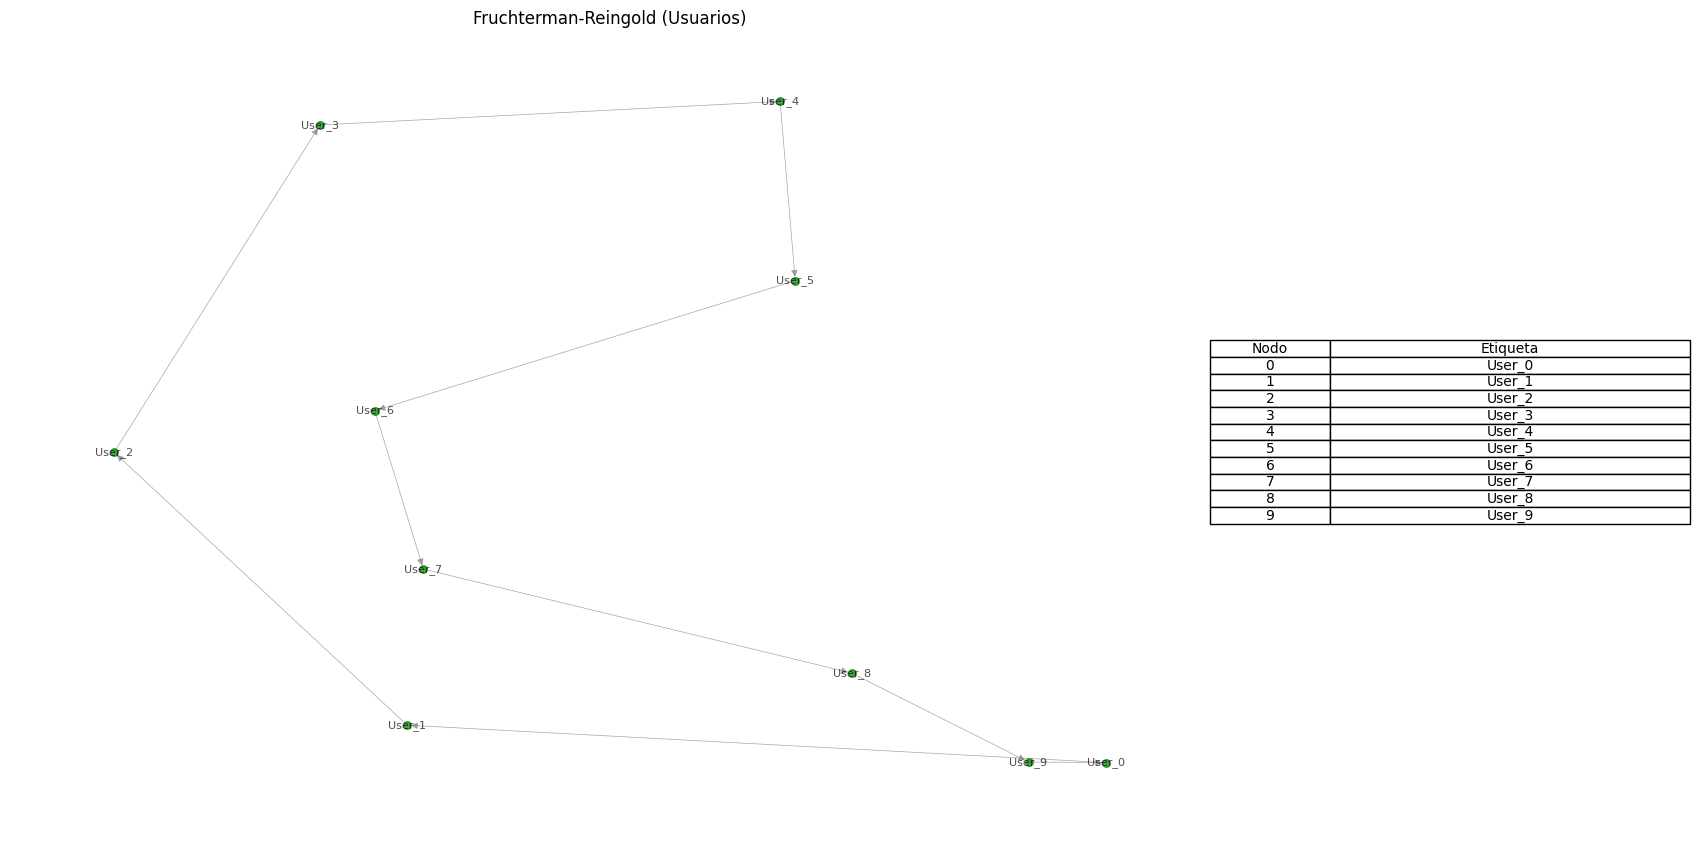

In [30]:
# Generar las visualizaciones con tablas
plot_graph_with_table(G_messages, nx.spring_layout, 'Fruchterman-Reingold (Mensajes)', 'blue', labels_messages)
plot_graph_with_table(G_users, nx.spring_layout, 'Fruchterman-Reingold (Usuarios)', 'green', labels_users)

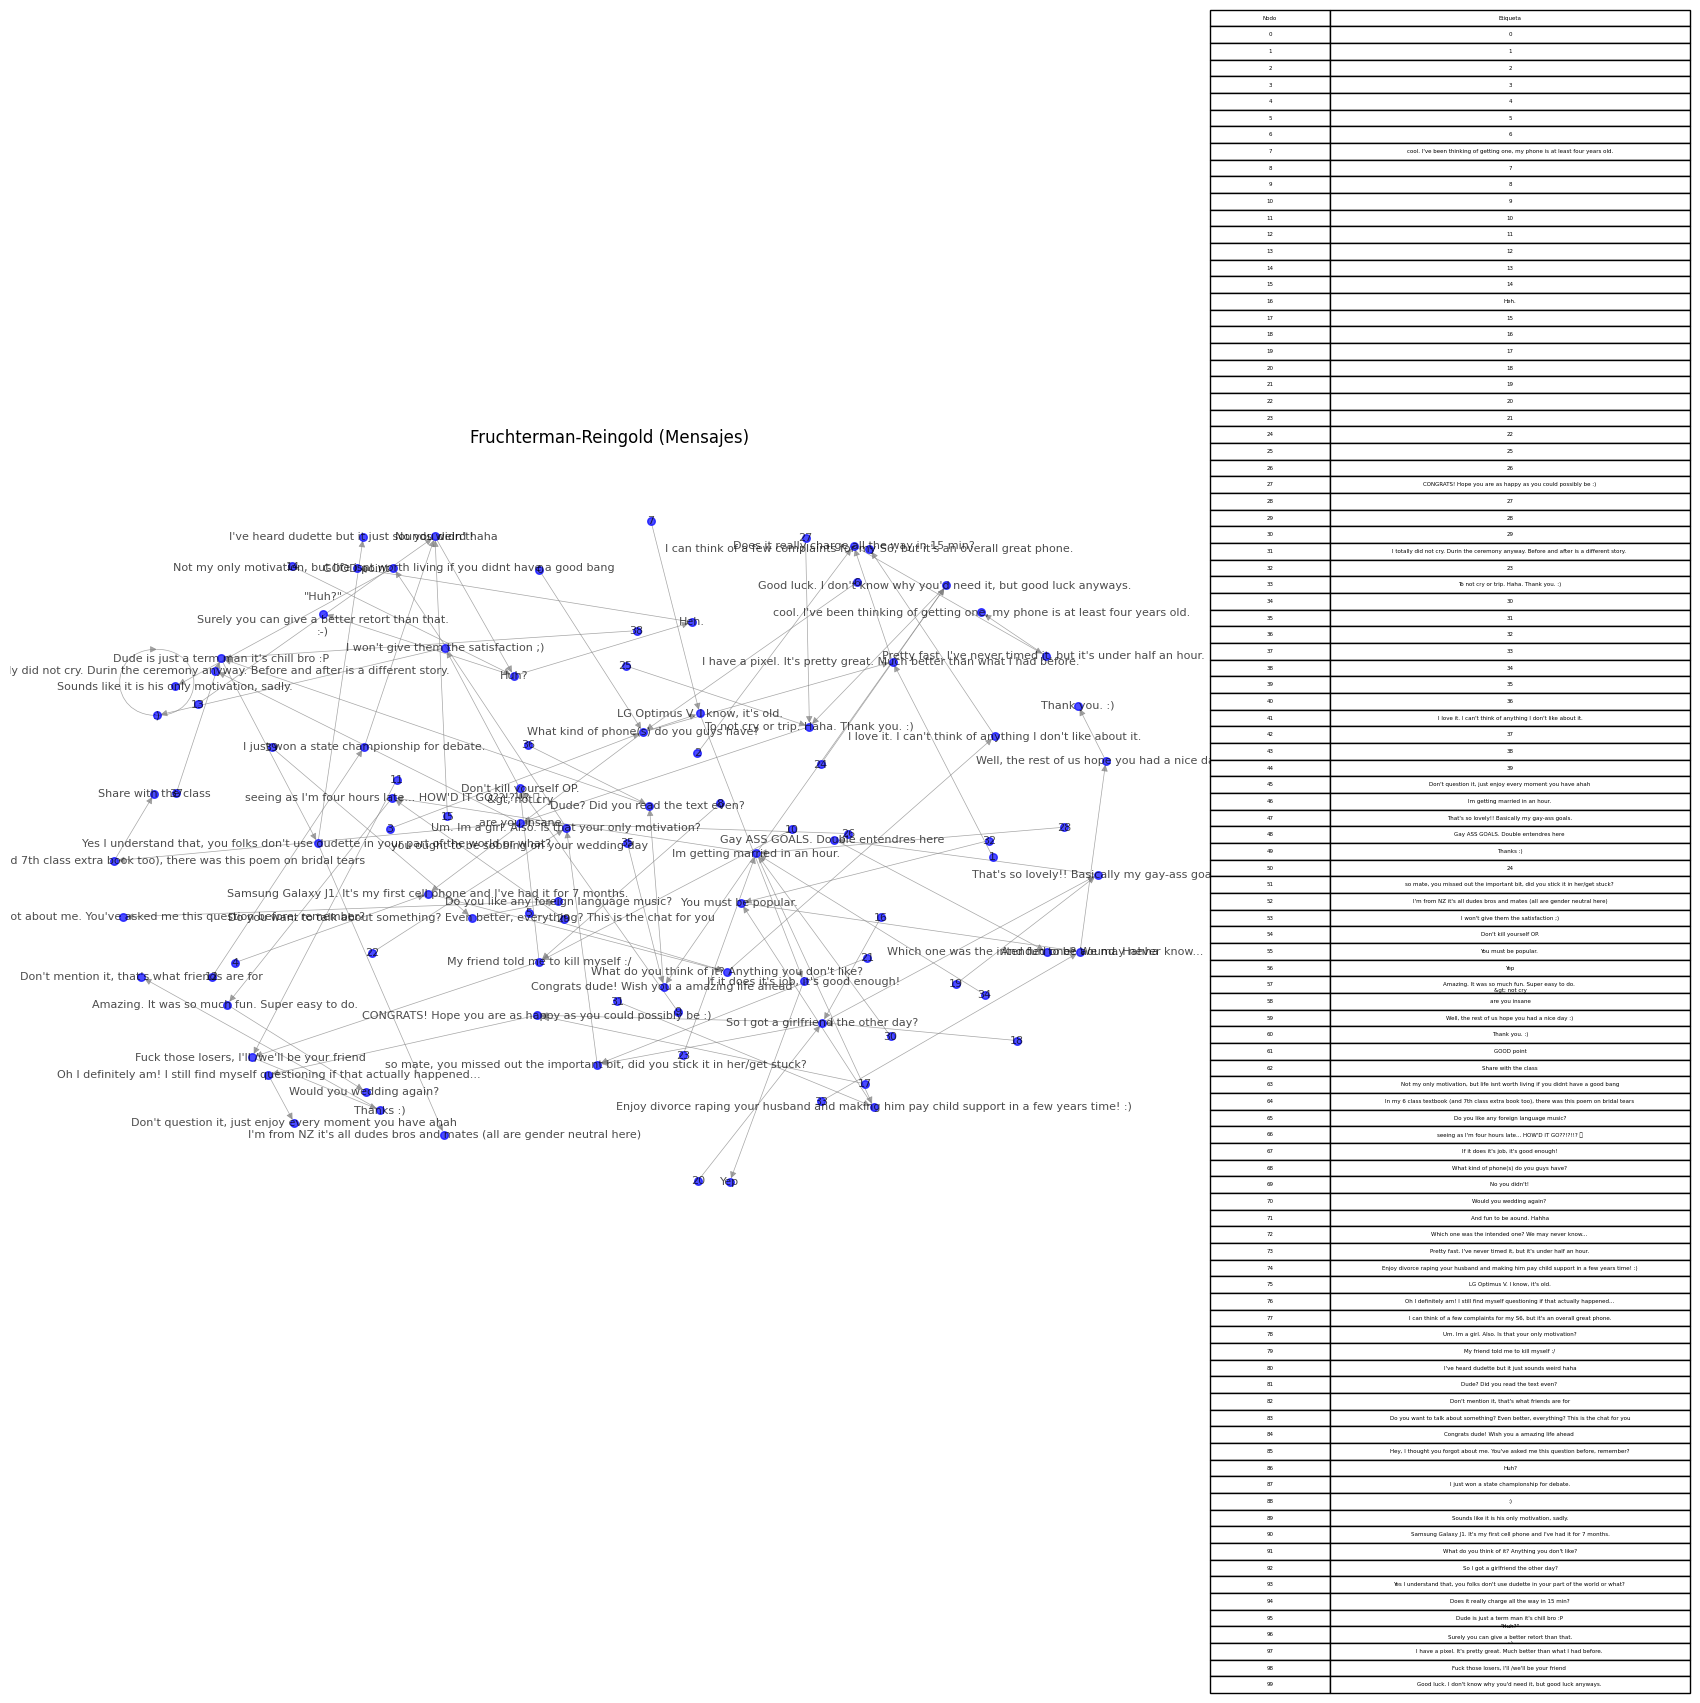

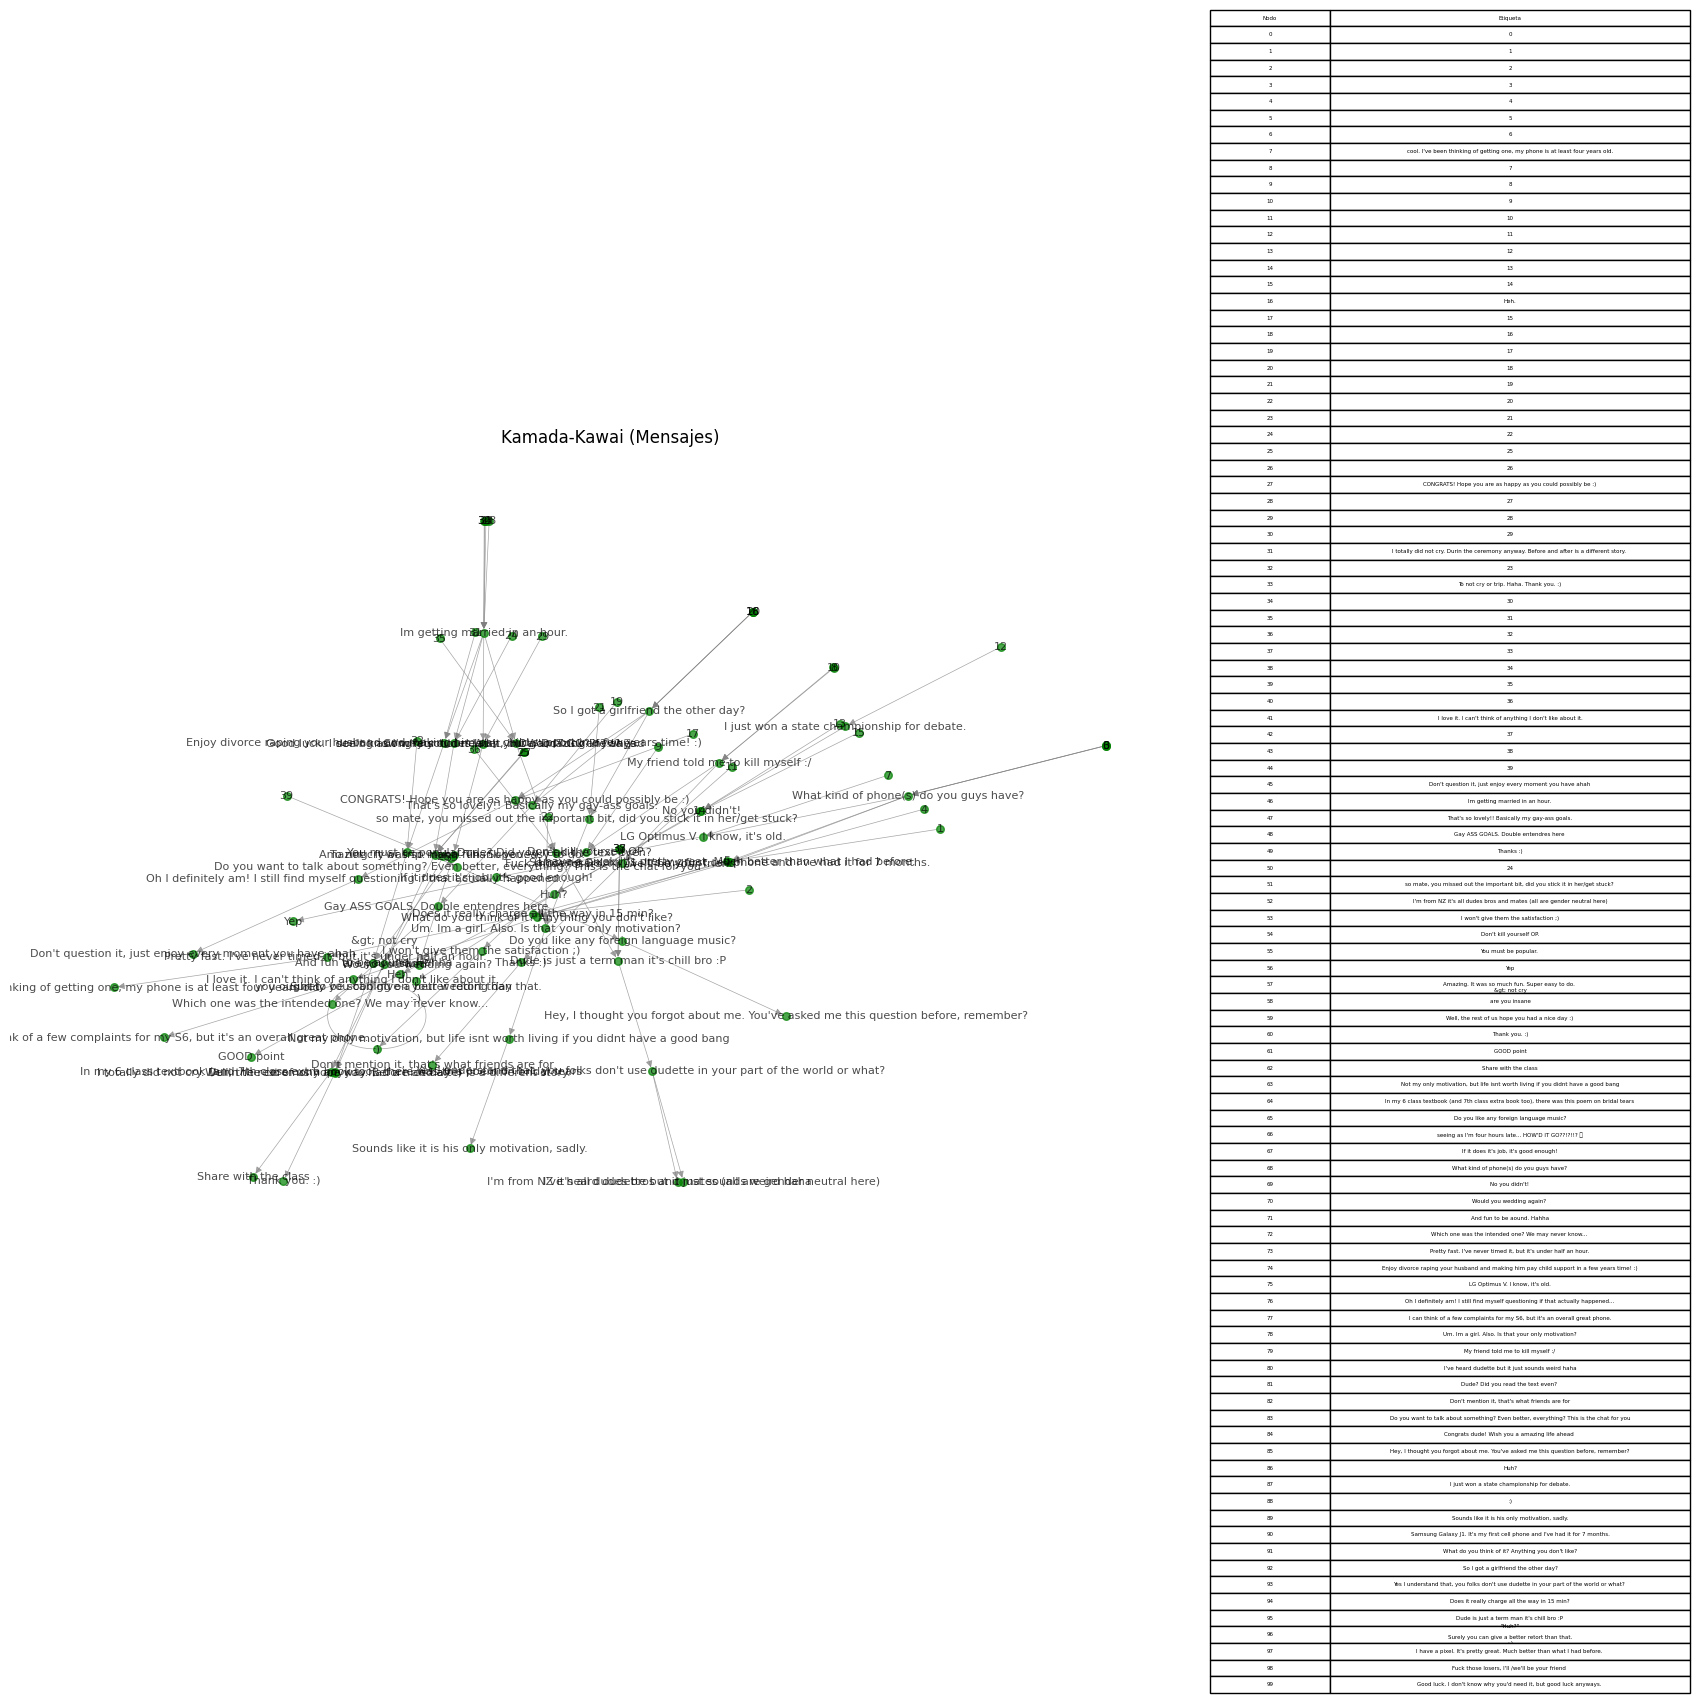

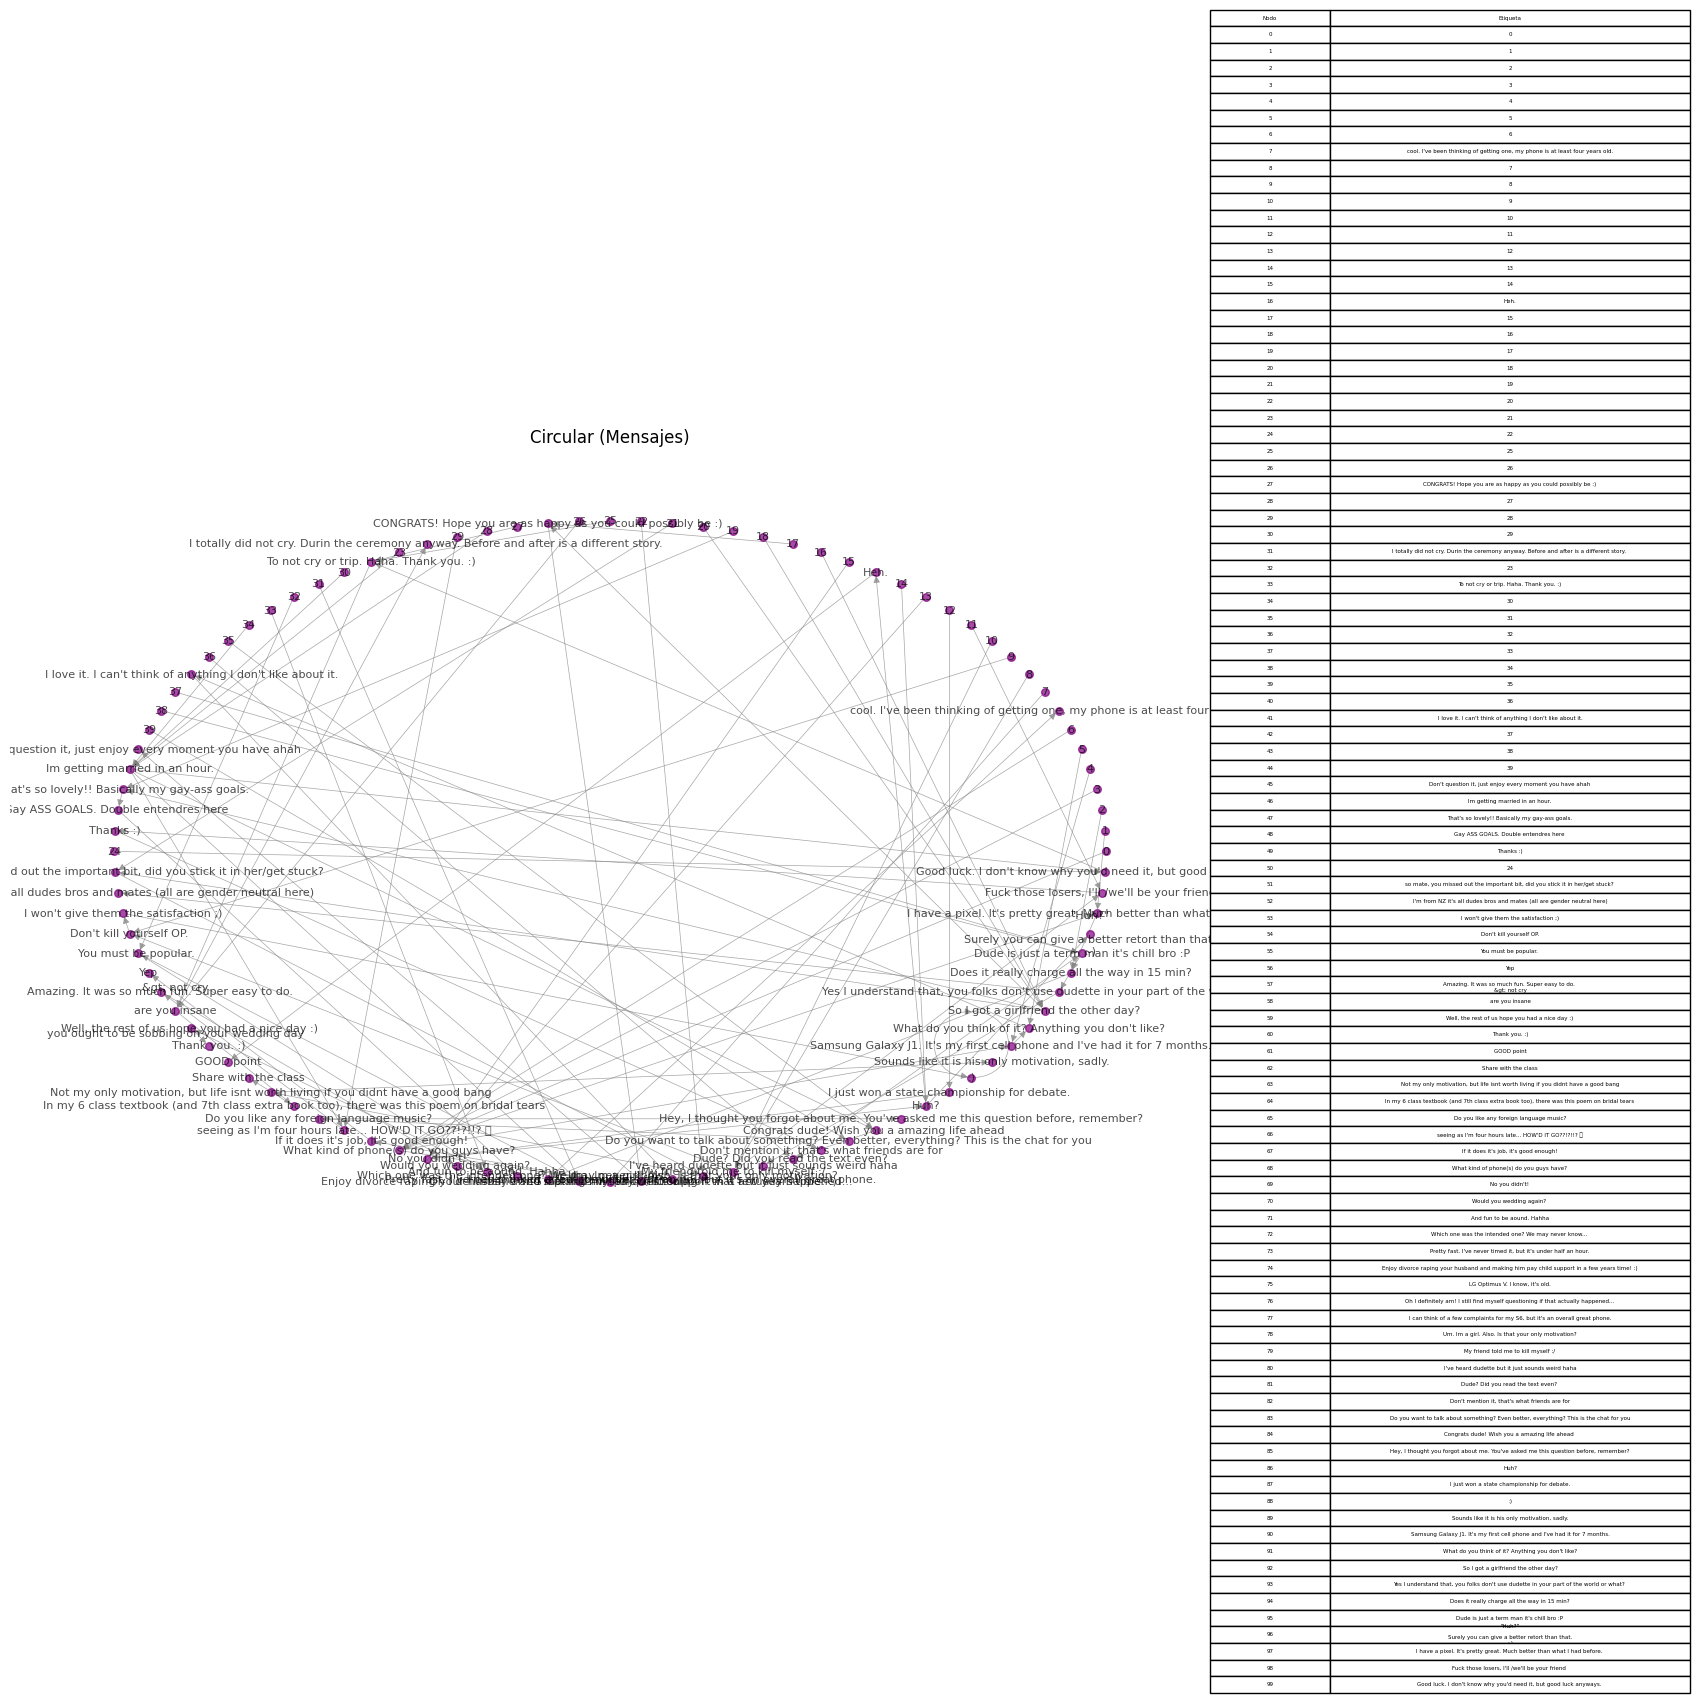

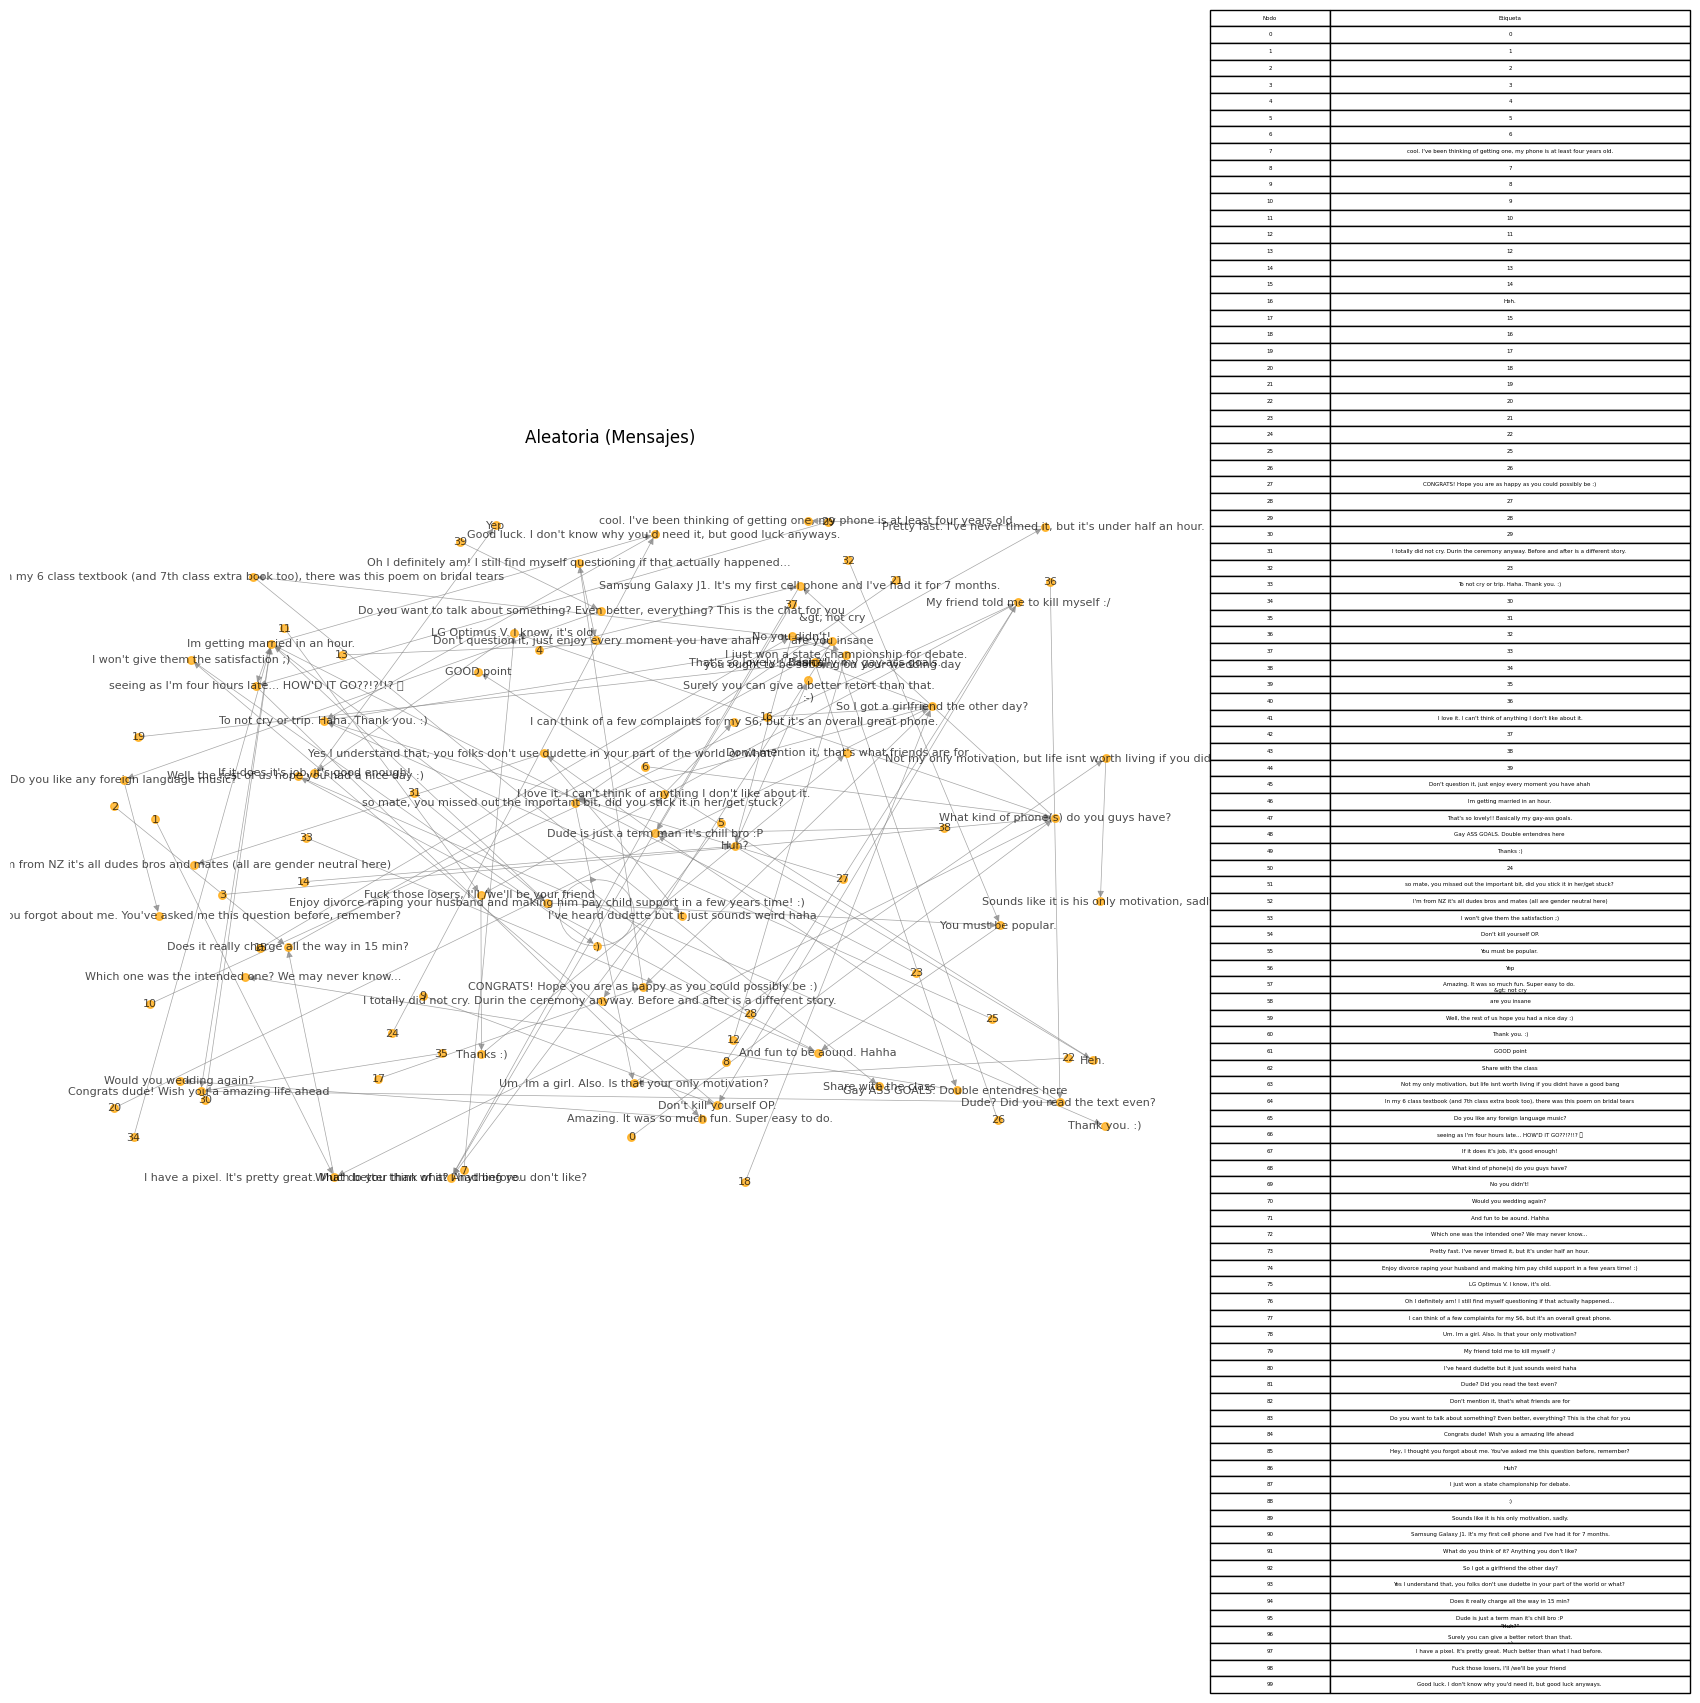

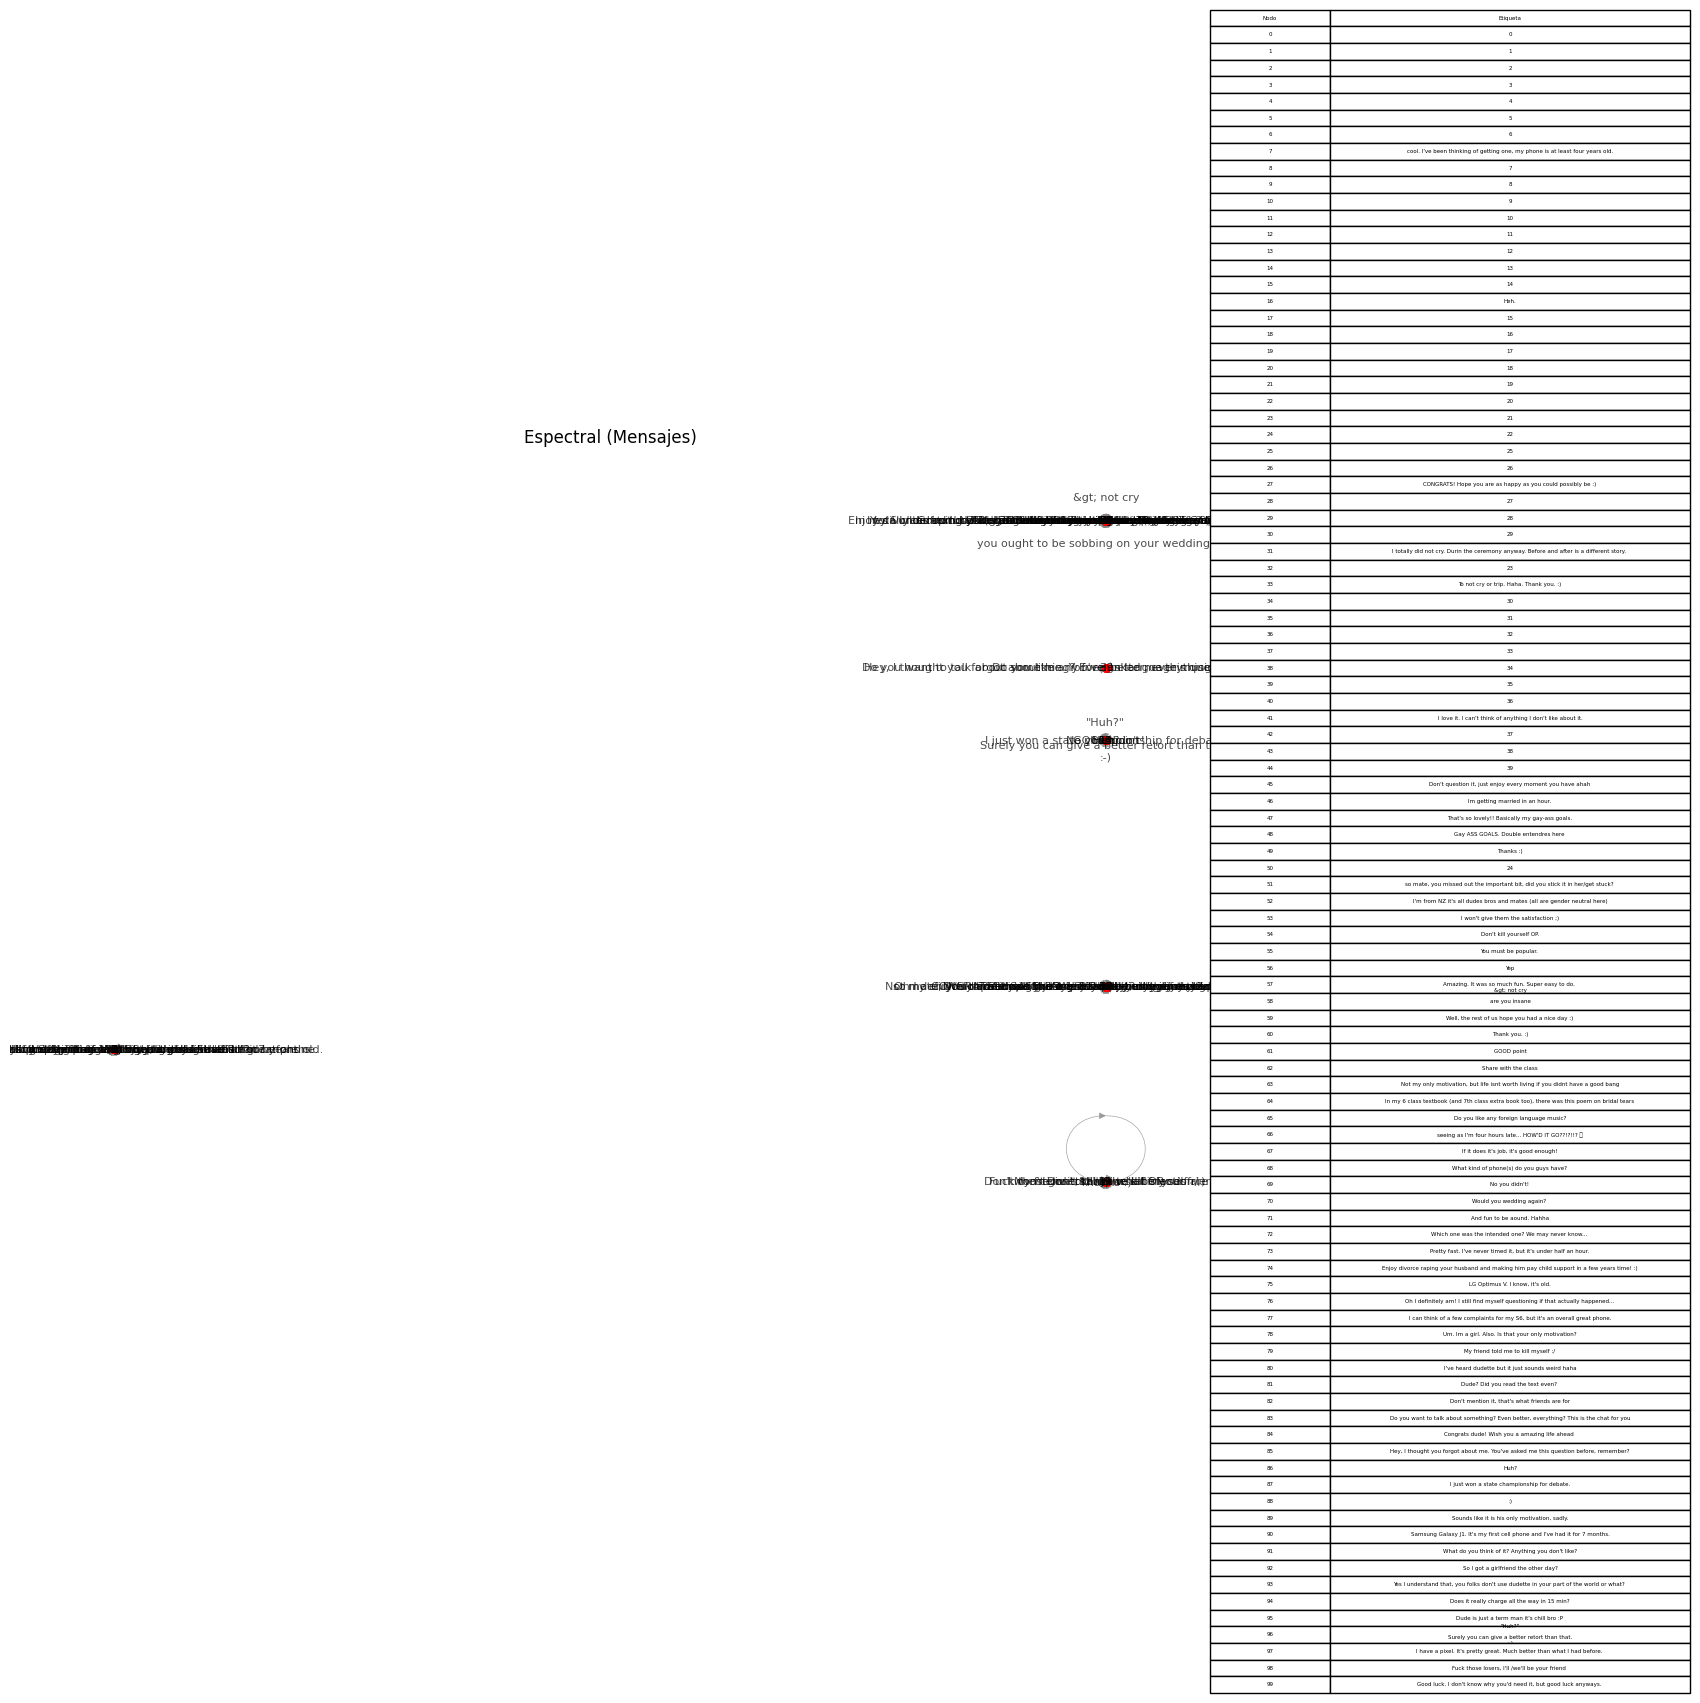

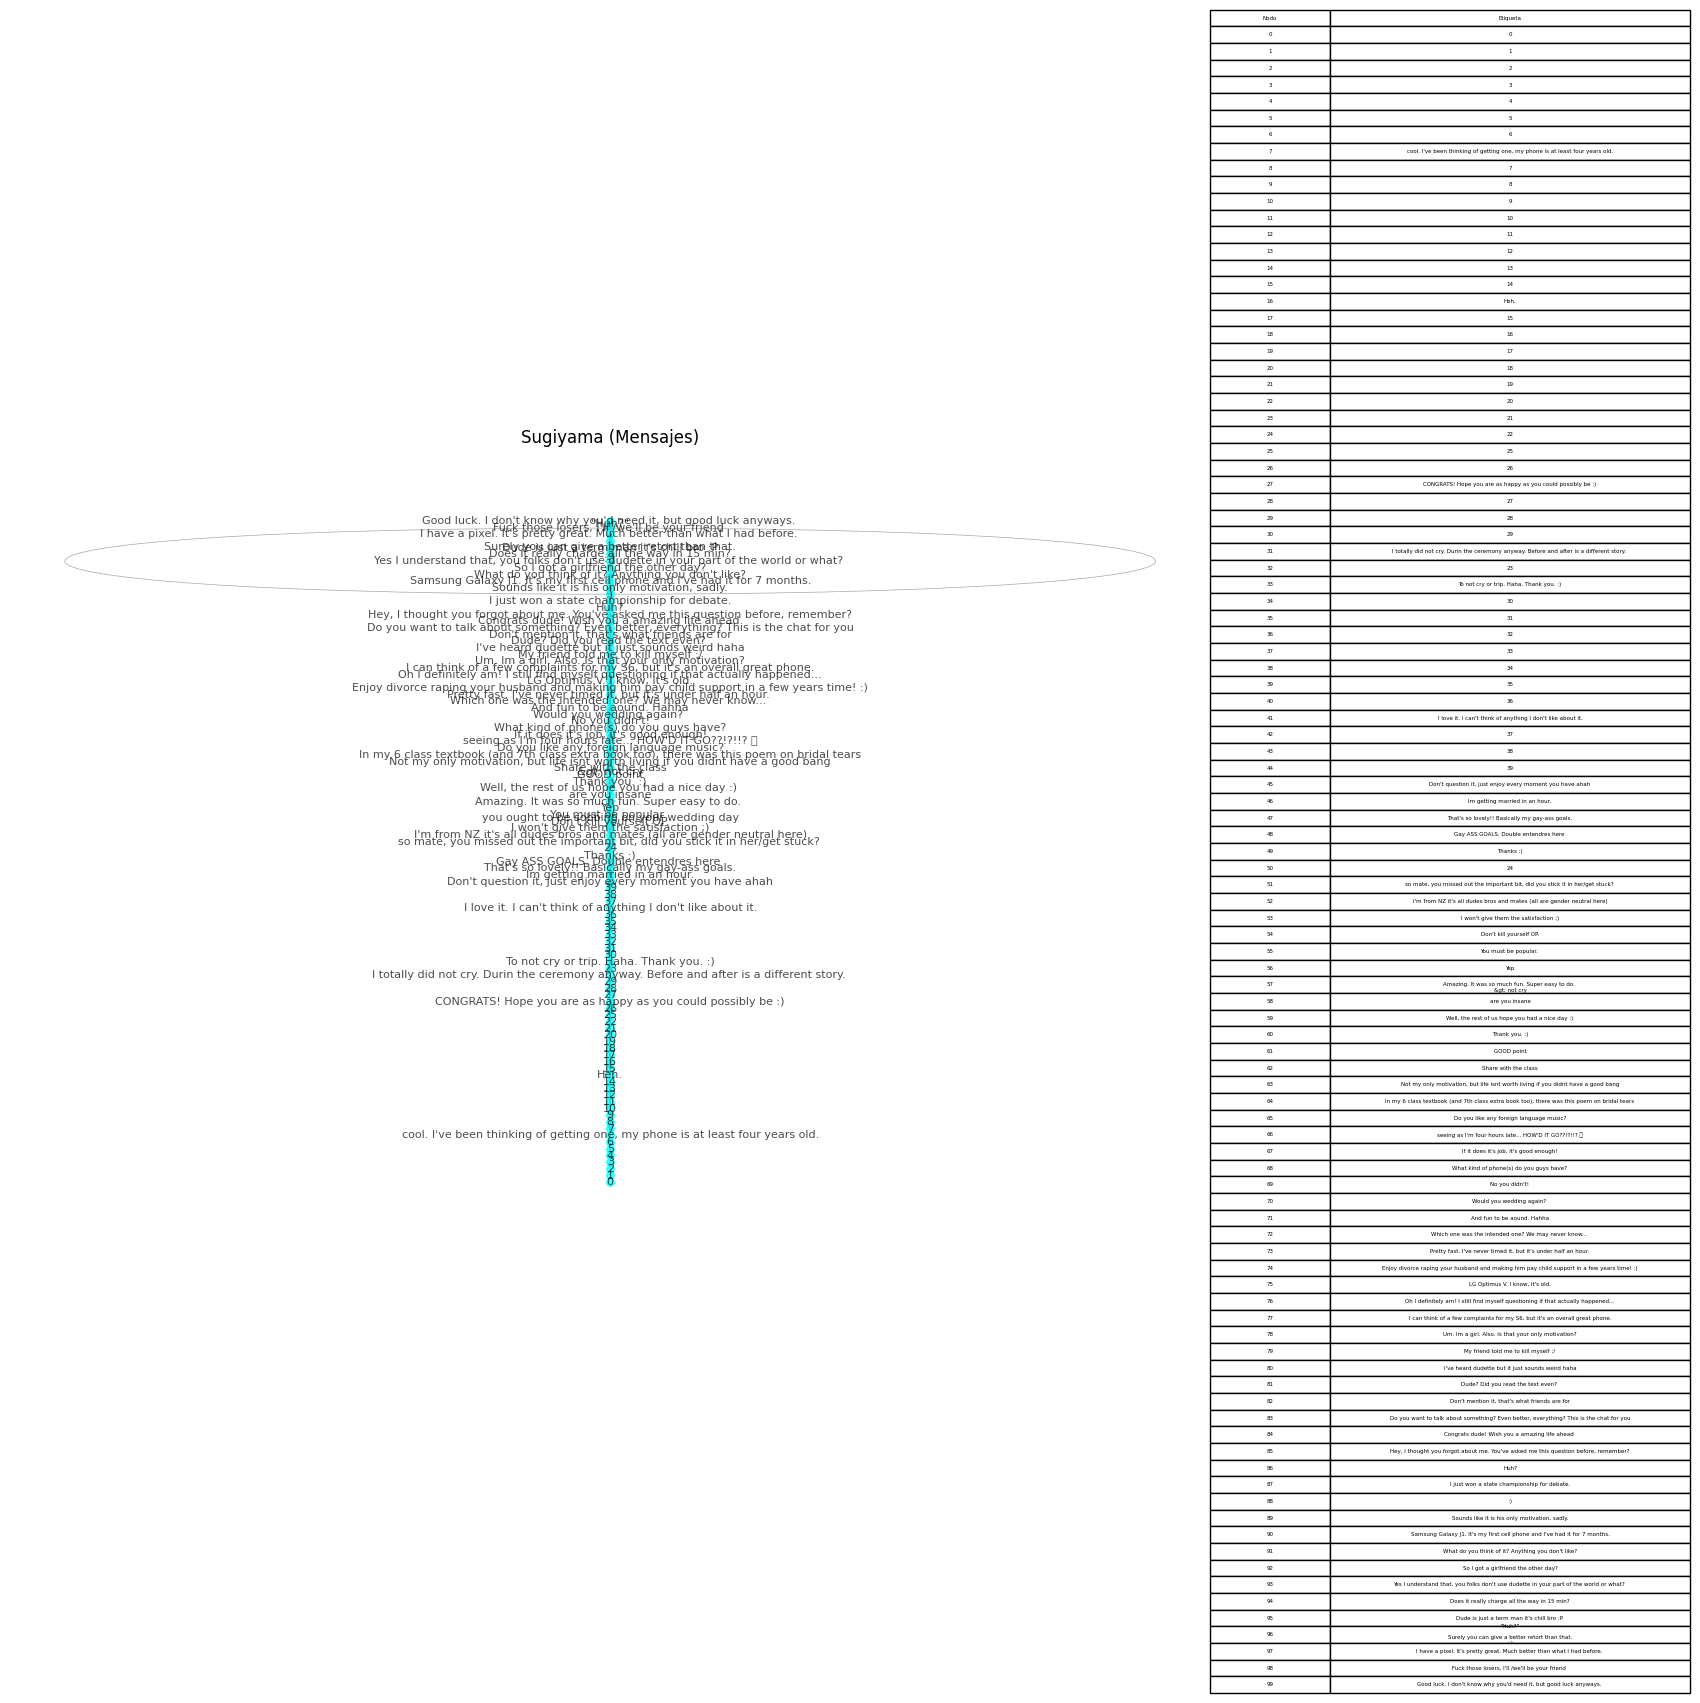

In [31]:
# Generar visualizaciones con tablas para G_messages
plot_graph_with_table(G_messages, nx.spring_layout, 'Fruchterman-Reingold (Mensajes)', 'blue', labels_messages)
plot_graph_with_table(G_messages, nx.kamada_kawai_layout, 'Kamada-Kawai (Mensajes)', 'green', labels_messages)
plot_graph_with_table(G_messages, nx.circular_layout, 'Circular (Mensajes)', 'purple', labels_messages)
plot_graph_with_table(G_messages, nx.random_layout, 'Aleatoria (Mensajes)', 'orange', labels_messages)
plot_graph_with_table(G_messages, nx.spectral_layout, 'Espectral (Mensajes)', 'red', labels_messages)
plot_graph_with_table(G_messages, nx.multipartite_layout, 'Sugiyama (Mensajes)', 'cyan', labels_messages, subset_key="layer") # Añadimos subset_key para multipartite_layout


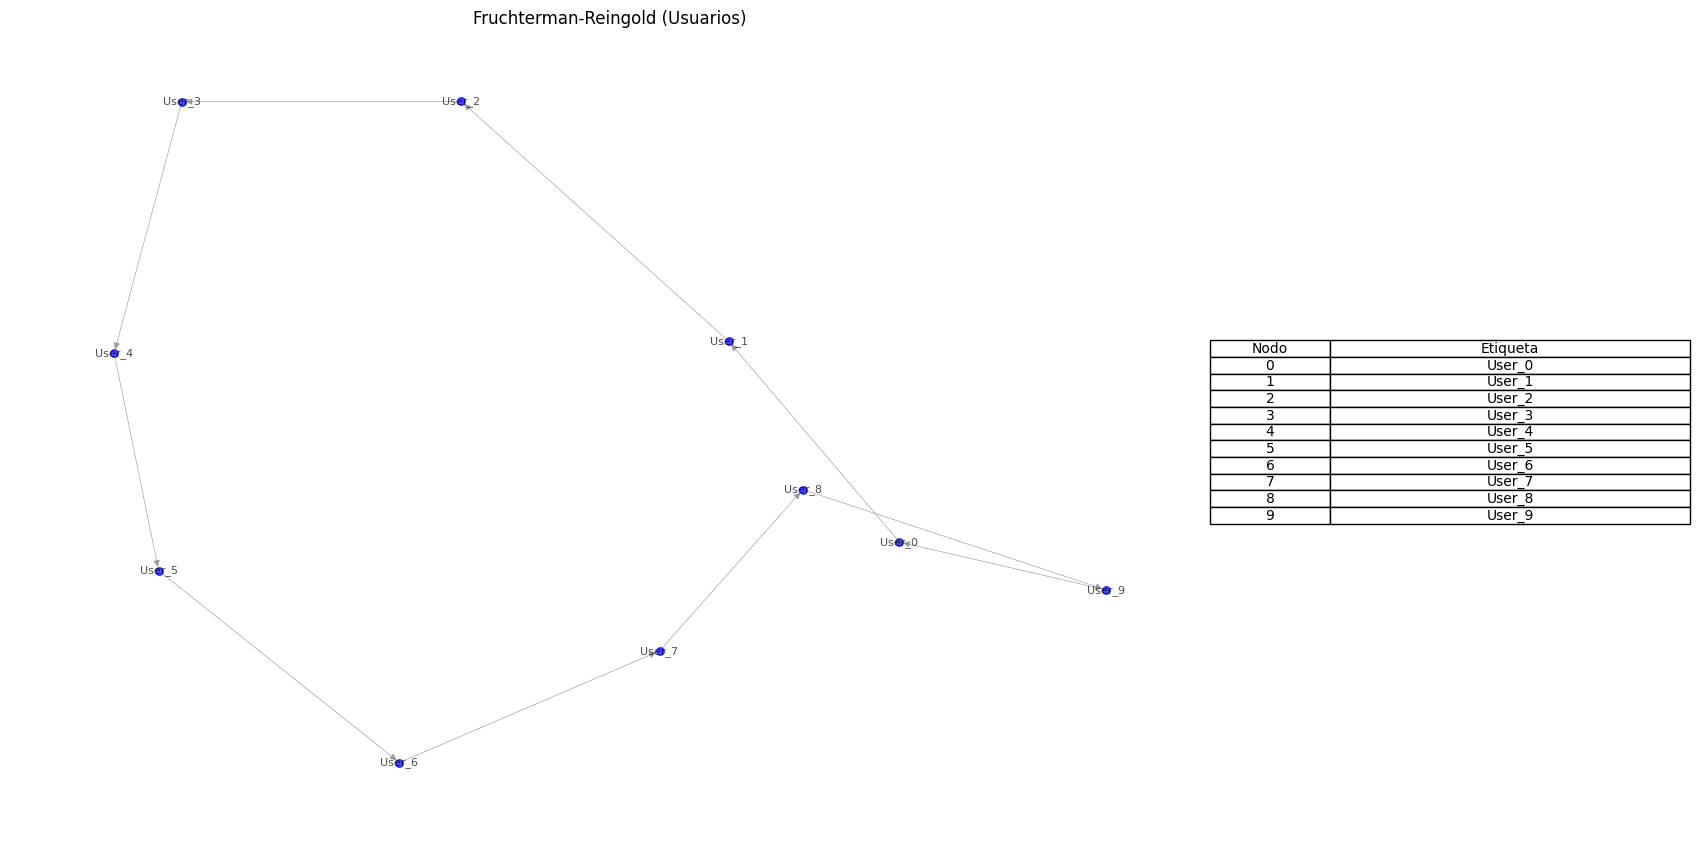

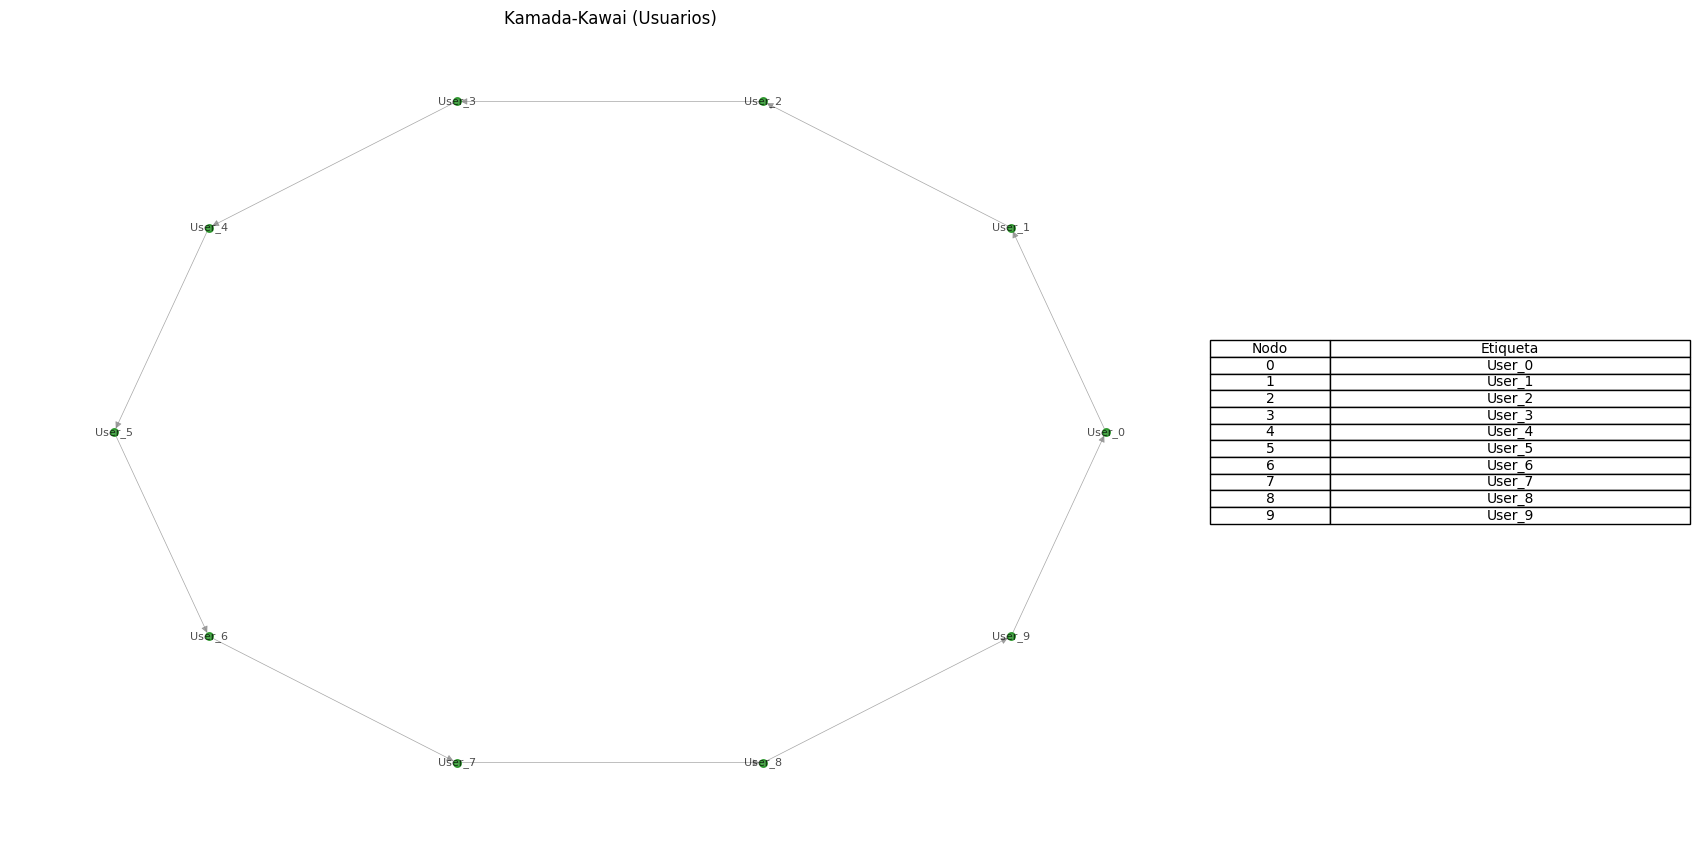

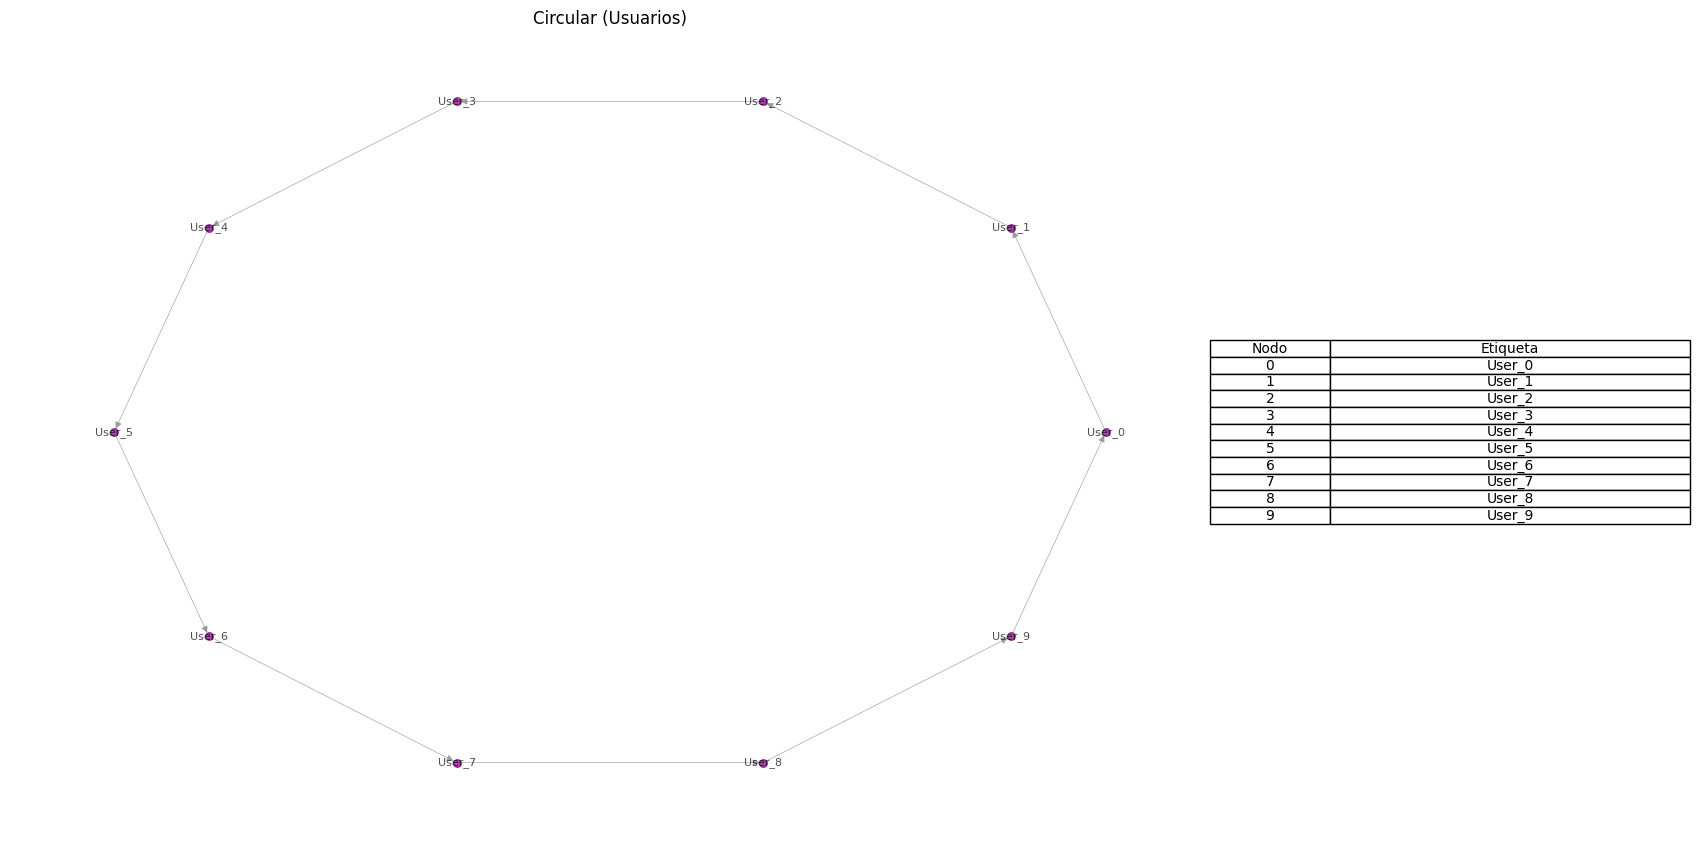

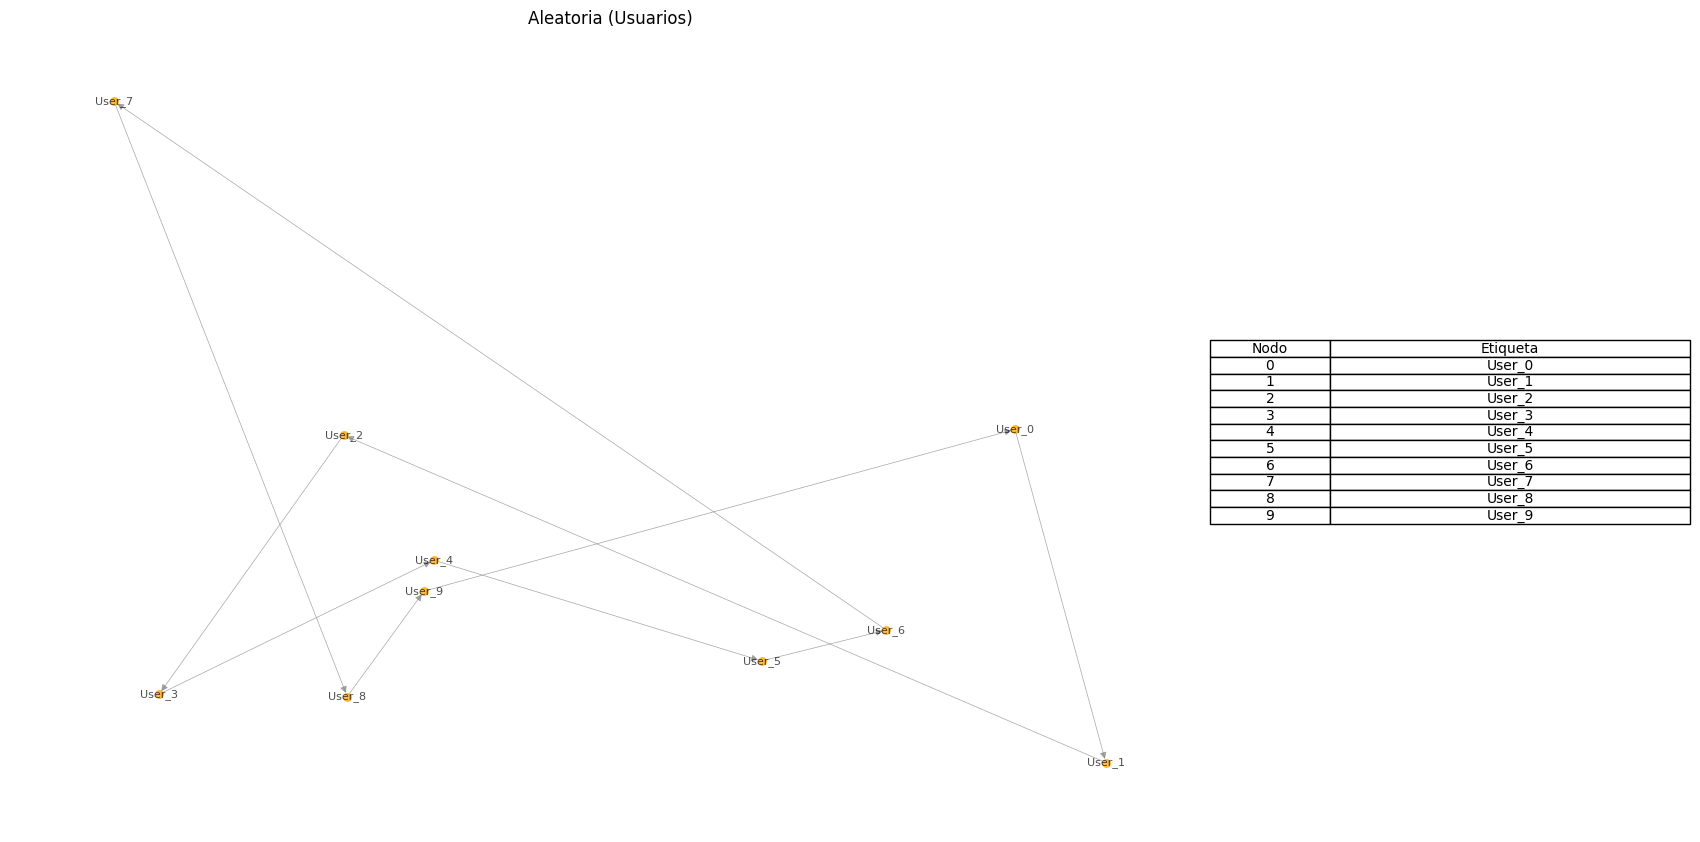

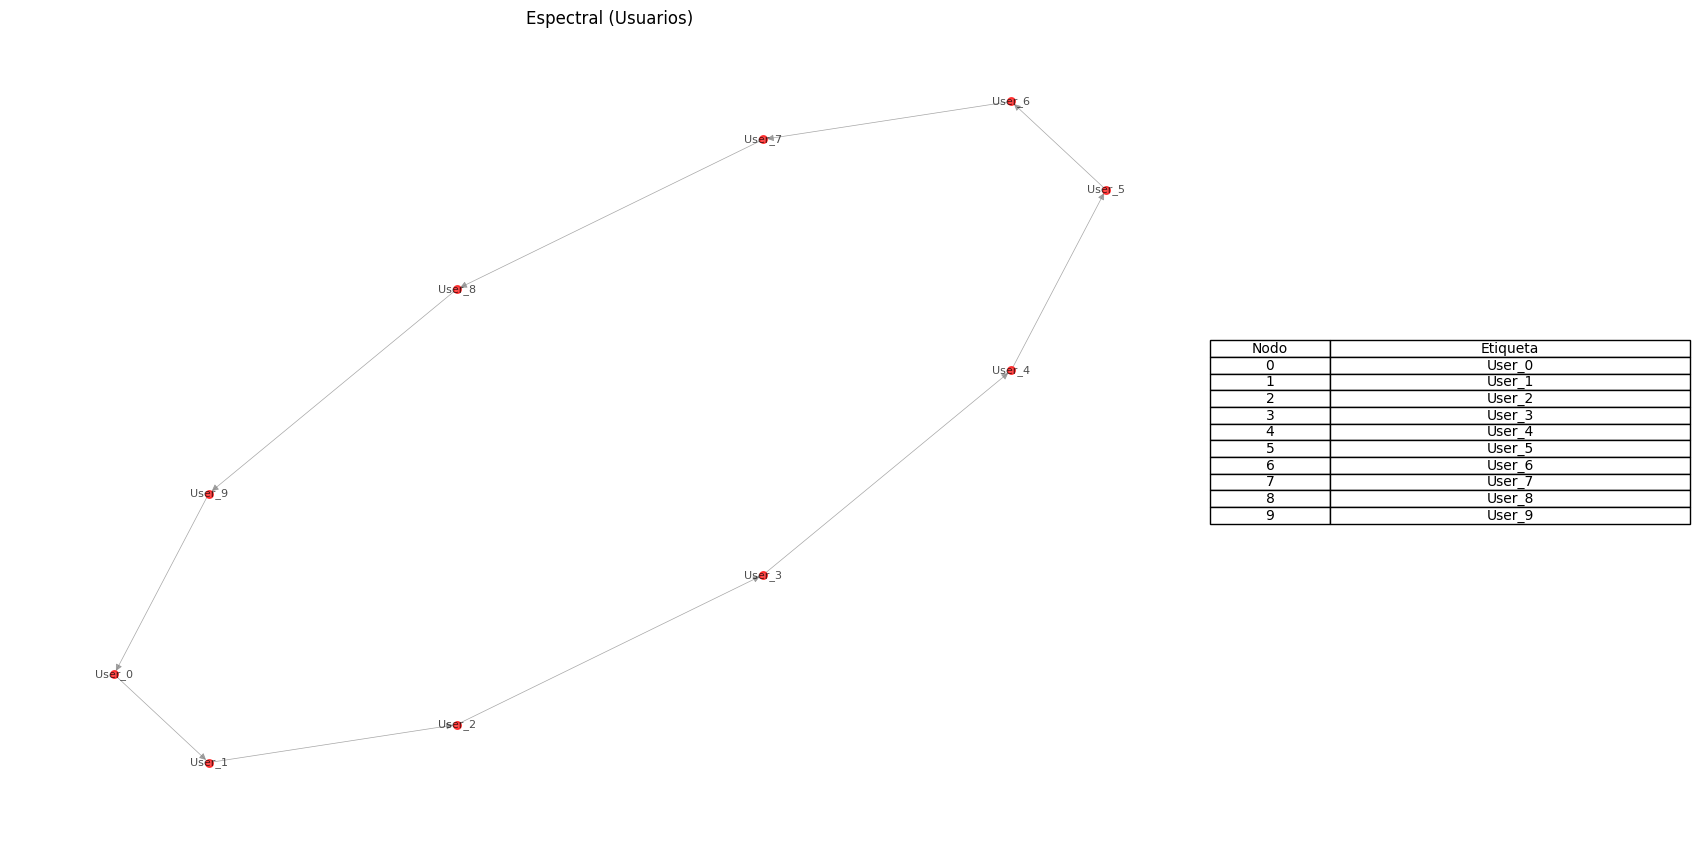

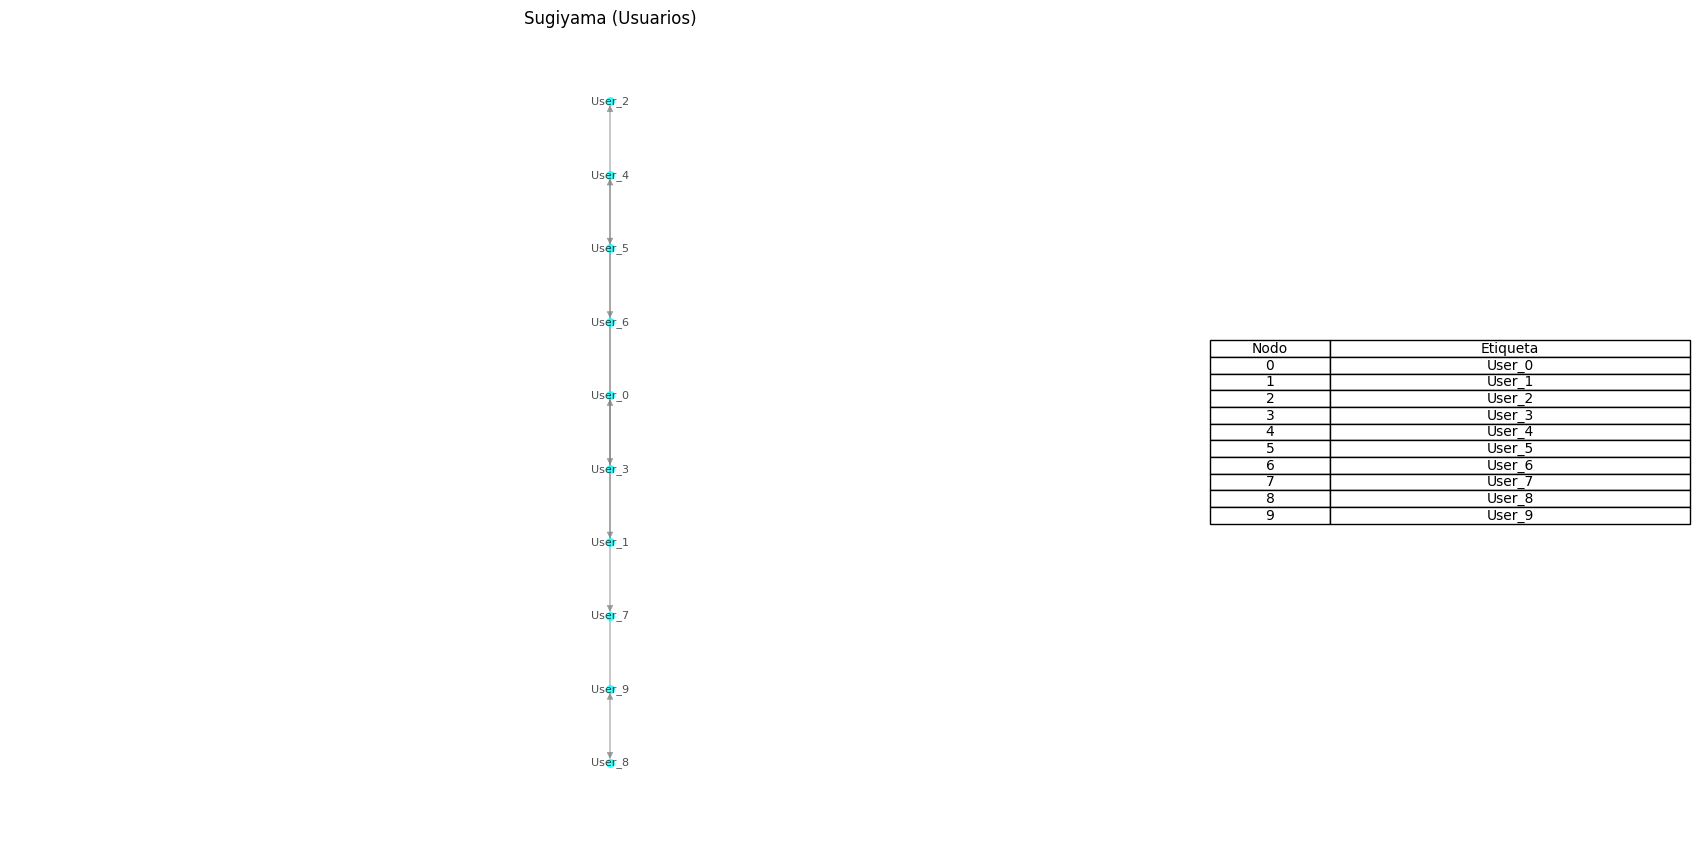

In [32]:
# Generar visualizaciones con tablas para G_users
plot_graph_with_table(G_users, nx.spring_layout, 'Fruchterman-Reingold (Usuarios)', 'blue', labels_users)
plot_graph_with_table(G_users, nx.kamada_kawai_layout, 'Kamada-Kawai (Usuarios)', 'green', labels_users)
plot_graph_with_table(G_users, nx.circular_layout, 'Circular (Usuarios)', 'purple', labels_users)
plot_graph_with_table(G_users, nx.random_layout, 'Aleatoria (Usuarios)', 'orange', labels_users)
plot_graph_with_table(G_users, nx.spectral_layout, 'Espectral (Usuarios)', 'red', labels_users)
plot_graph_with_table(G_users, nx.multipartite_layout, 'Sugiyama (Usuarios)', 'cyan', labels_users, subset_key="layer") # Añadimos subset_key para multipartite_layout